# Generate Data

In [44]:
# Imports
from pathlib import Path
from tqdm import tqdm
from elements import elements
from mendeleev import element

from Code.cifSimulation import structureGenerator
from Code.h5Constructor import h5Constructor

import cProfile

## Cif generation

In [46]:
# Path to dataset
datasetPath = './Dataset/CIFs/SimulatedTest2/'

# Initialize the CIF generator
generator = structureGenerator()

# Maximum number of atom species in generated structures
n_species = 2

# Choose required atoms to use
required_atoms = ['O']

# Choose optional atoms to use
metals = [atom.Symbol for atom in elements.Alkali_Metals] 
metals += [atom.Symbol for atom in elements.Alkaline_Earth_Metals] 
metals += [atom.Symbol for atom in elements.Transition_Metals] 
metals += [atom.Symbol for atom in elements.Metalloids] 
metals += [atom.Symbol for atom in elements.Others]

optional_atoms = []
for metal in metals:
    try:
        elm_data = element(metal)
        if elm_data.metallic_radius or elm_data.atomic_radius:
            optional_atoms.append(metal)
        else:
            print(f'Removed {metal} from dataset as no table values were available.')
    except:
        print(f'Removed {metal} from dataset as no table values were available.')
# optional_atoms = ['Zn', 'Nb']

# Simulate mono-metal oxides
# generator.create_cif_dataset(
#     n_species=n_species,
#     required_atoms=required_atoms,
#     optional_atoms=optional_atoms,
#     from_table_values=False,
#     save_folder=datasetPath,
# )
print(f'Number of metals: {len(optional_atoms)}')

Removed Fr from dataset as no table values were available.
Removed Bh from dataset as no table values were available.
Removed Db from dataset as no table values were available.
Removed Hs from dataset as no table values were available.
Removed Mt from dataset as no table values were available.
Removed Rf from dataset as no table values were available.
Removed Sg from dataset as no table values were available.
Removed Uub from dataset as no table values were available.
Removed Uun from dataset as no table values were available.
Removed Uuu from dataset as no table values were available.
Number of metals: 54


In [47]:
# Choose optional atoms to use
metals = [atom.Symbol for atom in elements.Alkali_Metals] 
metals += [atom.Symbol for atom in elements.Alkaline_Earth_Metals] 
metals += [atom.Symbol for atom in elements.Transition_Metals] 
metals += [atom.Symbol for atom in elements.Metalloids] 
metals += [atom.Symbol for atom in elements.Others]
metals += [atom.Symbol for atom in elements.Rare_Earth_Elements]

optional_atoms = []
for metal in metals:
    try:
        elm_data = element(metal)
        if elm_data.metallic_radius or elm_data.atomic_radius:
            optional_atoms.append(metal)
    except:
        print(f'Removed {metal} from dataset as no table values were available.')
print(f'Number of metals: {len(optional_atoms)}')

Removed Uub from dataset as no table values were available.
Removed Uun from dataset as no table values were available.
Removed Uuu from dataset as no table values were available.
Number of metals: 76


In [45]:
# Metals of interest
metals = [atom.Symbol for atom in elements.Alkali_Metals] 
metals += [atom.Symbol for atom in elements.Alkaline_Earth_Metals] 
metals += [atom.Symbol for atom in elements.Transition_Metals] 
metals += [atom.Symbol for atom in elements.Metalloids] 
metals += [atom.Symbol for atom in elements.Others] # Post-transition metals
metals += ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb',
        'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'] # Lanthanides

# Remove elements that does not have a well defined radius or are rare in nanoparticles
unwanted_elements = ['Fr', 'Po', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Uub', 'Uun', 'Uuu']
for elm in unwanted_elements:
    metals.remove(elm)

print(f'Number of metals: {len(metals)}')

Number of metals: 68


In [77]:
import numpy as np
metals = []
for i in range(len(stats2)):
    metals.append(stats2['Elements'].to_numpy()[i][1])
print(f'Number of metals: {len(np.unique(metals))}')

Number of metals: 51


## Query COD

In [ ]:
from pathlib import Path
import requests
import zipfile
import io
from multiprocessing import Pool, cpu_count
from itertools import islice, repeat
from tqdm.auto import tqdm
import argparse
from elements import elements
from mendeleev import element
import pandas as pd

In [ ]:
metals = [atom.Symbol for atom in elements.Alkali_Metals] 
metals += [atom.Symbol for atom in elements.Alkaline_Earth_Metals] 
metals += [atom.Symbol for atom in elements.Transition_Metals] 
metals += [atom.Symbol for atom in elements.Metalloids] 
metals += [atom.Symbol for atom in elements.Others] # Post-transition metals
metals += ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb',
           'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'] # Lanthanides

# Remove elements that does not have a well defined radius or are rare in nanoparticles
unwanted_elements = ['Fr', 'Po', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Uub', 'Uun', 'Uuu']
for elm in unwanted_elements:
    metals.remove(elm)
    
print(len(metals))

In [ ]:
non_metals = [atom.Symbol for atom in elements.Non_Metals]
non_metals += [atom.Symbol for atom in elements.Halogens]
non_metals.remove('At')

print(len(non_metals))

In [ ]:
# Find all possible two element combinations of metals and non-metals
combinations = []
for metal in metals:
    for non_metal in non_metals:
        combinations.append(([metal, non_metal], []))

for metal in metals:
    combinations.append(([metal], non_metals))

print(len(combinations))

In [ ]:
def queryCOD_new(input_tuple):
    (included_atoms, excluded_atoms), max_volume = input_tuple

    id_url = 'https://www.crystallography.net/cod/result?format=lst'
    if included_atoms:
        for i, included_atom in enumerate(included_atoms):
            id_url += f'&el{i+1}={included_atom}'
    if excluded_atoms:
        for i, excluded_atom in enumerate(excluded_atoms):
            id_url += f'&nel{i+1}={excluded_atom}'
    if max_volume:
        id_url += f'&vmax={max_volume}'
    
    id_response = requests.get(id_url)

    return id_response.text.split('\n')

In [ ]:
inputs = zip(combinations, repeat(1000))
id_list = []
with Pool(processes=cpu_count()-1) as pool:
    with tqdm(total=len(combinations), desc='Querying COD') as pbar:
        for returned_ids in pool.imap_unordered(queryCOD_new, inputs, chunksize=1):
            id_list.extend(returned_ids)
            pbar.update()

In [ ]:
df_ids = pd.DataFrame(id_list)
print(len(df_ids))
df_ids = df_ids.drop_duplicates()
print(len(df_ids))
df_ids.to_csv('./test_cif_IDs.csv', index=False, header=False)

In [ ]:
from Code.cifCleaning import cif_cleaning_pipeline
from Code.databaseQuery import queryCOD

# Path to dataset
cif_folder = './Dataset/CIFs/COD_subset/'

# Path to CIF ID list
id_list_path = './COD_subset_IDs.csv'

queryCOD(cif_folder, id_file=id_list_path)

In [ ]:
df_cifs = cif_cleaning_pipeline(cif_folder, chunksize=100)

In [ ]:
df_cifs.head()

In [ ]:
df_cifs[(df_cifs['Element0'] == 6) & (df_cifs['Element1'] == 8) & (df_cifs['Element2'].isna())]

In [ ]:
from ase.io import read
cif = read(df_cifs['filepath'].iloc[19477], format='cif')

In [ ]:
cif.symbols

In [ ]:
metals

In [ ]:
metal_numbers = [element(metal).atomic_number for metal in metals]
metal_numbers

In [ ]:
# df_cifs.columns.difference(['filepath', 'Spacegroup'])
contains_metals = df_cifs.apply(lambda row: any(atom in metal_numbers for atom in row[2:].values), axis=1)

In [ ]:
sum(~contains_metals)

In [ ]:
df_cifs[~contains_metals]

In [ ]:
# Cout nan values
df_cifs[df_cifs['Element1'].isna()].sort_values(by='filepath')

In [ ]:
from ase.io import read
from tqdm.auto import trange
metal_cifs = df_cifs[df_cifs['Element1'].isna()].sort_values(by='filepath')


In [ ]:
unit_cell = read(metal_cifs['filepath'].iloc[7].replace('_cleaned', ''))
print(unit_cell.get_chemical_formula())
print(unit_cell.get_chemical_symbols())
print(unit_cell.cell.cellpar())


In [ ]:
df_cifs.columns

In [ ]:
columns = ['Spacegroup', 'Element0', 'Element1', 'Element2',
       'Element3', 'Element4', 'Element5', 'Element6', 'Element7', 'Element8',
       'Element9', 'Element10']
for i in trange(len(df_cifs)):
    specific_row = df_cifs.iloc[i]

    duplicate_cifs = df_cifs[(df_cifs[columns] == specific_row[columns]).all(axis=1)]
    if len(duplicate_cifs) > 0:
        print(specific_row)
        print(duplicate_cifs.head())
        break



## .h5 generation

In [2]:
gc = h5Constructor(cif_dir='./Dataset/CIFs/SimulatedTest/', save_dir='./Dataset/h5/SimulatedTest2/')
# cProfile.run('gc.gen_h5s(parallelize=False, device="cuda")', sort='tottime')
gc.gen_h5s(parallelize=False, device='cuda', np_radii=[5, 10, 15, 20, 25])

Rutile_MoO2
NaCl_MoO
AntiFluorite_Co2O
Wurtzite_IrO
AntiFluorite_Pt2O
Wurtzite_CoO
ReO3_IrO3
Wurtzite_MoO
Spinel_FeFe2O4
CdI2_FeO2
AntiFluorite_Mo2O
Rutile_IrO2
Rutile_PtO2
ReO3_PtO3
AntiFluorite_Fe2O
NaCl_PtO
CdI2_CoO2
Wurtzite_PtO
NaCl_FeO
NaCl_IrO
Wurtzite_FeO
CdI2_MoO2
Fluorite_FeO2
Spinel_PtPt2O4
Spinel_MoMo2O4
Fluorite_CoO2
Fluorite_PtO2
Rutile_FeO2
CdI2_PtO2
ReO3_CoO3
Fluorite_MoO2
ReO3_MoO3
Spinel_IrIr2O4
AntiFluorite_Ir2O
ReO3_FeO3
Rutile_CoO2
NaCl_CoO
Spinel_CoCo2O4
Fluorite_IrO2
CdI2_IrO2


## Create unit cell graph

In [2]:
#%% Imports
import os, sys, math, torch
from mendeleev import element
from mendeleev.fetch import fetch_table
import numpy as np
from tqdm.auto import tqdm
import h5py
from itertools import repeat
from multiprocessing import Pool, cpu_count
from pathlib import Path
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
from networkx.algorithms.components import is_connected
from ase.io import read
from ase.build import make_supercell
from ase.spacegroup import get_spacegroup
from ase.visualize import view
# from Code.simScatteringPatterns import simPDFs, cif_to_NP_GPU
from debyecalculator import DebyeCalculator
from elements import elements
from mendeleev import element
from pymatgen.analysis.graphs import StructureGraph
from pymatgen.core.structure import Structure
from pymatgen.analysis.local_env import CrystalNN, MinimumDistanceNN
from pymatgen.io.ase import AseAtomsAdaptor
from timeit import default_timer as timer

In [3]:
# Path to cif file
# cif = './Dataset/CIFs/COD_subset_cleaned/1000023.cif'
#cif = './Dataset/CIFs/COD_subset_cleaned/1008022.cif'
cif = './Dataset/CIFs/COD_subset_cleaned/5910132.cif'

# Load cif
unit_cell = read(cif)

# Find spacegroup
spacegroup = get_spacegroup(unit_cell)

/home/ufj/anaconda3/envs/dataset_env/lib/python3.10/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(88, setting=1). This may result in wrong setting!
  warnings.warn(
/home/ufj/anaconda3/envs/dataset_env/lib/python3.10/site-packages/ase/spacegroup/spacegroup.py:433: UserWarning: scaled_positions 0 and 2 are equivalent
  warnings.warn('scaled_positions %d and %d '
/home/ufj/anaconda3/envs/dataset_env/lib/python3.10/site-packages/ase/spacegroup/spacegroup.py:433: UserWarning: scaled_positions 1 and 3 are equivalent
  warnings.warn('scaled_positions %d and %d '
/home/ufj/anaconda3/envs/dataset_env/lib/python3.10/site-packages/ase/spacegroup/spacegroup.py:433: UserWarning: scaled_positions 1 and 5 are equivalent
  warnings.warn('scaled_positions %d and %d '
/home/ufj/anaconda3/envs/dataset_env/lib/python3.10/site-packages/ase/spacegroup/spacegroup.py:433: UserWarning: scaled_positions 4 and 6 are equivalent
  warnings.

In [4]:
unit_cell.get_all_distances(mic=True)

array([[0.        , 3.70130214, 3.70130214, ..., 5.74189944, 1.17578831,
        4.28343538],
       [3.70130214, 0.        , 6.85058574, ..., 2.72219005, 4.28343538,
        5.74189944],
       [3.70130214, 6.85058574, 0.        , ..., 4.28343538, 2.72219005,
        1.17578831],
       ...,
       [5.74189944, 2.72219005, 4.28343538, ..., 0.        , 6.3706946 ,
        3.24457236],
       [1.17578831, 4.28343538, 2.72219005, ..., 6.3706946 , 0.        ,
        3.24457236],
       [4.28343538, 5.74189944, 1.17578831, ..., 3.24457236, 3.24457236,
        0.        ]])

In [ ]:
unit_cell.get_chemical_symbols()

In [ ]:
unit_cell.get_scaled_positions()

In [ ]:
# view(unit_cell, viewer='ngl')

In [ ]:
node_feature_table = fetch_table('elements')[['atomic_number', 'atomic_radius', 'atomic_weight', 'electron_affinity']]
node_feature_table['electron_affinity'].fillna(0.0, inplace=True)

# Metals of interest
metals = [atom.Symbol for atom in elements.Alkali_Metals] 
metals += [atom.Symbol for atom in elements.Alkaline_Earth_Metals] 
metals += [atom.Symbol for atom in elements.Transition_Metals] 
metals += [atom.Symbol for atom in elements.Metalloids] 
metals += [atom.Symbol for atom in elements.Others] # Post-transition metals
metals += ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb',
        'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'] # Lanthanides

# Remove elements that does not have a well defined radius or are rare in nanoparticles
unwanted_elements = ['Fr', 'Po', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Uub', 'Uun', 'Uuu']
for elm in unwanted_elements:
    metals.remove(elm)
    
# Convert to atomic numbers
metals = [element(metal).atomic_number for metal in metals]

In [ ]:
import plotly.graph_objects as go

def plot_atoms_and_bonds(node_pos_real, node_features, direction, edge_features):
    
    jmol_colors = [
        "#FFFFFF", "#8F8F8F", "#D9FFFF", "#CC80FF", "#C2FF00", "#FFB5B5", "#909090", "#3050F8", "#FF0D0D", "#90E050",
        "#B3E3F5", "#AB5CF2", "#8AFF00", "#BFA6A6", "#F0C8A0", "#FF8000", "#FFFF30", "#1FF01F", "#80D1E3", "#8F40D4",
        "#3DFF00", "#E6E6E6", "#BFC2C7", "#A6A6AB", "#8A99C7", "#9C7AC7", "#E06633", "#F090A0", "#50D050", "#C88033",
        "#7D80B0", "#C28F8F", "#668F8F", "#BD80E3", "#FFA100", "#A62929", "#5CB8D1", "#702EB0", "#00FF00", "#94FFFF",
        "#94E0E0", "#73C2C9", "#54B5B5", "#3B9E9E", "#248F8F", "#0A7D8C", "#006985", "#C0C0C0", "#FFD98F", "#A67573",
        "#668080", "#9E63B5", "#D47A00", "#940094", "#429EB0", "#57178F", "#00C900", "#70D4FF", "#FFFFC7", "#D9FFC7",
        "#C7FFC7", "#A3FFC7", "#8FFFC7", "#61FFC7", "#45FFC7", "#30FFC7", "#1FFFC7", "#00FF9C", "#00E675", "#00D452",
        "#00BF38", "#00AB24", "#4DC2FF", "#4DA6FF", "#2194D6", "#267DAB", "#266696", "#175487", "#D0D0E0", "#FFD123",
        "#B8B8D0", "#A6544D", "#575961", "#9E4FB5", "#AB5C00", "#754F45", "#428296", "#420066", "#007D00", "#70ABFA",
        "#00BAFF", "#00A1FF", "#008FFF", "#0080FF", "#006BFF", "#545CF2", "#785CE3", "#8A4FE3", "#A136D4", "#B31FD4",
        "#B31FBA", "#B30DA6", "#BD0D87", "#C70066", "#CC0059", "#D1004F", "#D90045", "#E00038", "#E6002E", "#EB0026",
        "#EB0026", "#F1001E"
    ]
    
    # Create a figure
    fig = go.Figure()
    
    # Add atoms to the figure
    for i in range(len(node_pos_real)):
        atom = node_pos_real[i]
        fig.add_trace(go.Scatter3d(
            x=[atom[0]],
            y=[atom[1]],
            z=[atom[2]],
            mode='markers',
            marker=dict(
                size=5,
                color=jmol_colors[int(node_features[i][0])],
            ),
            name=f'Atom {i+1}\n({node_features[i][0]})'
        ))

    # Add bonds to the figure
    for i in range(len(direction[0])):
        atom1 = node_pos_real[direction[0][i]]
        atom2 = node_pos_real[direction[1][i]]
        fig.add_trace(go.Scatter3d(
            x=[atom1[0], atom2[0]],
            y=[atom1[1], atom2[1]],
            z=[atom1[2], atom2[2]],
            mode='lines',
            line=dict(
                color='black',
                width=2
            ),
            name=f'Bond {i+1}\n({edge_features[i]:.2f})'
        ))

    # Set layout
    fig.update_layout(
        scene=dict(
            xaxis=dict(title='X'),
            yaxis=dict(title='Y'),
            zaxis=dict(title='Z')
        ),
        title='Atom Positions and Bonds',
        showlegend=True
    )

    # Show the figure
    fig.show()

In [ ]:
start = timer()
# Get distances with MIC (NOTE I don't think this makes a difference as long as pbc=True in the unit cell)
unit_cell_dist = unit_cell.get_all_distances(mic=True)
unit_cell_atoms = unit_cell.get_atomic_numbers().reshape(-1, 1)

# Make supercell to get Lattice constant
supercell = make_supercell(unit_cell, np.diag([2,2,2]))
# supercell = unit_cell
metal_distances = supercell[supercell.get_atomic_numbers() != 8].get_all_distances()
lc = np.amin(metal_distances[metal_distances > 0.])

# Create edges and node features
lc_mask = (unit_cell_dist > 0) & (unit_cell_dist < lc)
oxy_mask = np.outer(unit_cell_atoms == 8, unit_cell_atoms == 8)
metal_mask = np.outer(unit_cell_atoms != 8, unit_cell_atoms !=8)
direction = np.argwhere(lc_mask & ~oxy_mask & ~metal_mask).T

edge_features = unit_cell_dist[direction[0], direction[1]]
node_features = np.array([
    node_feature_table.loc[atom[0]-1].values
    for atom in unit_cell_atoms
    ], dtype='float')
node_pos_real = unit_cell.get_positions()
node_pos_relative = unit_cell.get_scaled_positions()

stop = timer()
print(f'Time to create graph: {stop-start:.2e} s')
print(f'Number of edges: {len(direction[0])}')
# plot_atoms_and_bonds(node_pos_real, node_features, direction, edge_features)

In [ ]:
start = timer()
# Get distances with MIC (NOTE I don't think this makes a difference as long as pbc=True in the unit cell)
unit_cell_dist = unit_cell.get_all_distances(mic=True)
unit_cell_atoms = unit_cell.get_atomic_numbers().reshape(-1, 1)

# metal_filter = np.isin(unit_cell_atoms, metals)

# Find node features
node_features = np.array([
    node_feature_table.loc[atom[0]-1].values
    for atom in unit_cell_atoms
    ], dtype='float')

# Create mask of threshold for bonds
bond_threshold = np.zeros_like(unit_cell_dist)
for i, r1 in enumerate(node_features[:,1]):
    bond_threshold[i,:] = (r1 + node_features[:,1]) / 100 * 1.25
np.fill_diagonal(bond_threshold, 0.)

# Find edges
direction = np.argwhere(unit_cell_dist < bond_threshold).T

edge_features = unit_cell_dist[direction[0], direction[1]]

node_pos_real = unit_cell.get_positions()
node_pos_relative = unit_cell.get_scaled_positions()

stop = timer()
print(f'Time to create graph: {stop-start:.2e} s')
print(f'Number of edges: {len(direction[0])}')
# plot_atoms_and_bonds(node_pos_real, node_features, direction, edge_features)

In [ ]:
unit_cell_atoms.T

In [ ]:
direction

In [ ]:
node_pos_relative

In [ ]:
start = timer()
# Get distances with MIC (NOTE I don't think this makes a difference as long as pbc=True in the unit cell)
unit_cell_dist = unit_cell.get_all_distances(mic=True)
unit_cell_atoms = unit_cell.get_atomic_numbers().reshape(-1, 1)

# Create edges and node features
struc = AseAtomsAdaptor.get_structure(unit_cell)
crystal_nn = CrystalNN()
strucGraph = StructureGraph.with_local_env_strategy(struc, crystal_nn)
direction = np.array(strucGraph.graph.edges)[:,:2].T

edge_features = unit_cell_dist[direction[0], direction[1]]
node_features = np.array([
    node_feature_table.loc[atom[0]-1].values
    for atom in unit_cell_atoms
    ], dtype='float')
node_pos_real = unit_cell.get_positions()
node_pos_relative = unit_cell.get_scaled_positions()

stop = timer()
print(f'Time to create graph: {stop-start:.2e} s')
print(f'Number of edges: {len(direction[0])}')
# plot_atoms_and_bonds(node_pos_real, node_features, direction, edge_features)

In [ ]:
start = timer()
# Get distances with MIC (NOTE I don't think this makes a difference as long as pbc=True in the unit cell)
unit_cell_dist = unit_cell.get_all_distances(mic=True)
unit_cell_atoms = unit_cell.get_atomic_numbers().reshape(-1, 1)

# Create edges and node features
struc = AseAtomsAdaptor.get_structure(unit_cell)
crystal_nn = CrystalNN(distance_cutoffs=None, x_diff_weight=0.0, porous_adjustment=False)
strucGraph = StructureGraph.with_local_env_strategy(struc, crystal_nn)
direction = np.array(strucGraph.graph.edges)[:,:2].T

edge_features = unit_cell_dist[direction[0], direction[1]]
node_features = np.array([
    node_feature_table.loc[atom[0]].values
    for atom in unit_cell_atoms
    ], dtype='float')
node_pos_real = unit_cell.get_positions()
node_pos_relative = unit_cell.get_scaled_positions()

stop = timer()
print(f'Time to create graph: {stop-start:.2e} s')
print(f'Number of edges: {len(direction[0])}')
# plot_atoms_and_bonds(node_pos_real, node_features, direction)

In [ ]:
start = timer()
# Get distances with MIC (NOTE I don't think this makes a difference as long as pbc=True in the unit cell)
unit_cell_dist = unit_cell.get_all_distances(mic=True)
unit_cell_atoms = unit_cell.get_atomic_numbers().reshape(-1, 1)

# Create edges and node features
struc = AseAtomsAdaptor.get_structure(unit_cell)
minimum_nn = MinimumDistanceNN()
strucGraph = StructureGraph.with_local_env_strategy(struc, minimum_nn)
direction = np.array(strucGraph.graph.edges)[:,:2].T

edge_features = unit_cell_dist[direction[0], direction[1]]
node_features = np.array([
    node_feature_table.loc[atom[0]-1].values
    for atom in unit_cell_atoms
    ], dtype='float')
node_pos_real = unit_cell.get_positions()
node_pos_relative = unit_cell.get_scaled_positions()

stop = timer()
print(f'Time to create graph: {stop-start:.2e} s')
print(f'Number of edges: {len(direction[0])}')
# plot_atoms_and_bonds(node_pos_real, node_features, direction, edge_features)

## Create supercell graph

In [ ]:
r_max = 10 # Maximum radius of the particle
cell_dims = unit_cell.cell.cellpar()[:3] # Get the cell dimensions
padding = 2 # Symmetric padding to ensure the particle does not exceed the supercell boundary
supercell_matrix = np.diag((np.ceil(r_max / cell_dims)) * 2 + padding)
supercell = make_supercell(prim=unit_cell, P=supercell_matrix)
# supercell = make_supercell(unit_cell, np.diag([2,2,2]))
# supercell.center(about=0)
supercell.get_positions().max(axis=0)

In [ ]:
cell_dims

In [ ]:
unit_cell.get_positions().max(axis=0)

In [ ]:
view(supercell, viewer='ngl')

In [ ]:
from pymatgen.analysis.local_env import CrystalNN, MinimumDistanceNN, IsayevNN, JmolNN, MinimumOKeeffeNN, MinimumVIRENN, OpenBabelNN, VoronoiNN

In [ ]:
# Setup of structure and local neighborhood strategies
struc = AseAtomsAdaptor.get_structure(supercell)
crystal_nn = CrystalNN()
minDist_nn = MinimumDistanceNN()
isayev_nn = IsayevNN()
jmol_nn = JmolNN()
keeffe_nn = MinimumOKeeffeNN()
viree_nn = MinimumVIRENN()
voronoi_nn = VoronoiNN()

In [ ]:
# CrystalNN
start_crystalNN = timer()
# Find edges
strucGraph = StructureGraph.with_local_env_strategy(struc, crystal_nn)
stop_crystalNN = timer()
# Save number of edges
nEdges_crystalNN = np.array(strucGraph.graph.edges)[:,:2].T.shape[1]


In [ ]:
# MinimumDistanceNN
start_minDistNN = timer()
# Find edges
strucGraph = StructureGraph.with_local_env_strategy(struc, minDist_nn)
stop_minDistNN = timer()
# Save number of edges
nEdges_minDistNN = np.array(strucGraph.graph.edges)[:,:2].T.shape[1]



In [ ]:
# IsayevNN
start_isayevNN = timer()
# Find edges
strucGraph = StructureGraph.with_local_env_strategy(struc, isayev_nn)
stop_isayevNN = timer()
# Save number of edges
nEdges_isayevNN = np.array(strucGraph.graph.edges)[:,:2].T.shape[1]



In [ ]:
# JmolNN
start_jmolNN = timer()
# Find edges
strucGraph = StructureGraph.with_local_env_strategy(struc, jmol_nn)
stop_jmolNN = timer()
# Save number of edges
nEdges_jmolNN = np.array(strucGraph.graph.edges)[:,:2].T.shape[1]



In [ ]:
# MinimumOKeeffeNN
start_okeeffeNN = timer()
# Find edges
strucGraph = StructureGraph.with_local_env_strategy(struc, keeffe_nn)
stop_okeeffeNN = timer()
# Save number of edges
nEdges_okeeffeNN = np.array(strucGraph.graph.edges)[:,:2].T.shape[1]



In [ ]:
# MinimumVIRENN
start_vireeNN = timer()
# Find edges
strucGraph = StructureGraph.with_local_env_strategy(struc, viree_nn)
stop_vireeNN = timer()
# Save number of edges
nEdges_vireeNN = np.array(strucGraph.graph.edges)[:,:2].T.shape[1]



In [ ]:
# VoronoiNN
start_voronoiNN = timer()
# Find edges
strucGraph = StructureGraph.with_local_env_strategy(struc, voronoi_nn)
stop_voronoiNN = timer()
# Save number of edges
nEdges_voronoiNN = np.array(strucGraph.graph.edges)[:,:2].T.shape[1]



In [ ]:
print('Timing results:')
print('_________________________________________________________')
print('Method | Time (s) | Number of edges')
print('_________________________________________________________')
print(f'CrystalNN | {stop_crystalNN-start_crystalNN:.2e} | {nEdges_crystalNN}')
print(f'MinimumDistanceNN | {stop_minDistNN-start_minDistNN:.2e} | {nEdges_minDistNN}')
# print(f'IsayevNN | {stop_isayevNN-start_isayevNN:.2e} | {nEdges_isayevNN}')
print(f'JmolNN | {stop_jmolNN-start_jmolNN:.2e} | {nEdges_jmolNN}')
print(f'MinimumOKeeffeNN | {stop_okeeffeNN-start_okeeffeNN:.2e} | {nEdges_okeeffeNN}')
# print(f'MinimumVIRENN | {stop_vireeNN-start_vireeNN:.2e} | {nEdges_vireeNN}')
# print(f'VoronoiNN | {stop_voronoiNN-start_voronoiNN:.2e} | {nEdges_voronoiNN}')
print('_________________________________________________________')

In [ ]:
start = timer()
supercell_dist = supercell.get_all_distances(mic=False)
supercell_atoms = supercell.get_atomic_numbers().reshape(-1, 1)

# Create edges and node features
struc = AseAtomsAdaptor.get_structure(supercell)
crystal_nn = CrystalNN()
strucGraph = StructureGraph.with_local_env_strategy(struc, crystal_nn)
direction = np.array(strucGraph.graph.edges)[:,:2].T

edge_features = supercell_dist[direction[0], direction[1]]
node_features = np.array([
    node_feature_table.loc[atom[0]].values
    for atom in supercell_atoms
    ], dtype='float')
node_pos_real = supercell.get_positions()
node_pos_relative = supercell.get_scaled_positions()

stop = timer()
print(f'Time to create graph: {stop-start:.2f} s')
print(f'Number of edges: {len(direction[0])}')
#plot_atoms_and_bonds(node_pos_real, node_features, direction)

In [ ]:
start = timer()
# Get distances with MIC (NOTE I don't think this makes a difference as long as pbc=True in the unit cell)
supercell_dist = supercell.get_all_distances(mic=False)
supercell_atoms = supercell.get_atomic_numbers().reshape(-1, 1)

# metal_filter = np.isin(unit_cell_atoms, metals)

# Find node features
node_features = np.array([
    node_feature_table.loc[atom[0]-1].values
    for atom in supercell_atoms
    ], dtype='float')

# Create mask of threshold for bonds
bond_threshold = np.zeros_like(supercell_dist)
for i, r1 in enumerate(node_features[:,1]):
    bond_threshold[i,:] = (r1 + node_features[:,1]) / 100 * 1.25
np.fill_diagonal(bond_threshold, 0.)

# Find edges
direction = np.argwhere(supercell_dist < bond_threshold).T

# Handle case with no edges
if len(direction[0]) == 0:
    min_dist = np.amin(supercell_dist[supercell_dist > 0])
    direction = np.argwhere(supercell_dist < min_dist * 1.1).T
    
edge_features = supercell_dist[direction[0], direction[1]]

node_pos_real = supercell.get_positions()
node_pos_relative = supercell.get_scaled_positions()

stop = timer()
print(f'Time to create graph: {stop-start:.2e} s')
print(f'Number of edges: {len(direction[0])}')
#plot_atoms_and_bonds(node_pos_real, node_features, direction, edge_features)

In [ ]:
len(direction[0])

In [ ]:
start = timer()
supercell_dist = supercell.get_all_distances(mic=False)
supercell_atoms = supercell.get_atomic_numbers().reshape(-1, 1)

# Create edges and node features
struc = AseAtomsAdaptor.get_structure(supercell)
crystal_nn = CrystalNN(distance_cutoffs=None, x_diff_weight=0.0, porous_adjustment=False)
strucGraph = StructureGraph.with_local_env_strategy(struc, crystal_nn)
direction = np.array(strucGraph.graph.edges)[:,:2].T

edge_features = supercell_dist[direction[0], direction[1]]
node_features = np.array([
    node_feature_table.loc[atom[0]].values
    for atom in supercell_atoms
    ], dtype='float')
node_pos_real = supercell.get_positions()
node_pos_relative = supercell.get_scaled_positions()

stop = timer()
print(f'Time to create graph: {stop-start:.2f} s')
print(f'Number of edges: {len(direction[0])}')
#plot_atoms_and_bonds(node_pos_real, node_features, direction)

In [ ]:
start = timer()
supercell_dist = supercell.get_all_distances(mic=False)
supercell_atoms = supercell.get_atomic_numbers().reshape(-1, 1)

# Create edges and node features
struc = AseAtomsAdaptor.get_structure(supercell)
minDist_nn = MinimumDistanceNN()
strucGraph = StructureGraph.with_local_env_strategy(struc, minDist_nn)
direction = np.array(strucGraph.graph.edges)[:,:2].T

edge_features = supercell_dist[direction[0], direction[1]]
node_features = np.array([
    node_feature_table.loc[atom[0]].values
    for atom in supercell_atoms
    ], dtype='float')
node_pos_real = supercell.get_positions()
node_pos_relative = supercell.get_scaled_positions()

stop = timer()
print(f'Time to create graph: {stop-start:.2f} s')
print(f'Number of edges: {len(direction[0])}')
#plot_atoms_and_bonds(node_pos_real, node_features, direction)


## Misc

In [ ]:
from mendeleev import element
from mendeleev.fetch import fetch_table

In [ ]:
node_feature_table = fetch_table('elements')[['atomic_number', 'atomic_radius', 'atomic_weight', 'electron_affinity']]

In [ ]:
node_feature_table.describe()

In [ ]:
node_feature_table['electron_affinity'].fillna(0.0, inplace=True)

In [ ]:
node_feature_table['atomic_radius']

In [ ]:
node_feature_table.describe()

In [ ]:
import numpy as np

# Define the element symbol
element_symbol = 'O'

# Get the row corresponding to the element symbol
element_row = node_feature_table[node_feature_table['symbol'] == element_symbol]

# Extract the required features as a numpy array
element_features = element_row[['atomic_number', 'atomic_radius', 'atomic_weight', 'electron_affinity']].to_numpy()


In [ ]:
element_features.flatten()

# Load and inspect data

In [4]:
from Code.datasetClass import InOrgMatDatasets
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from mendeleev import element
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
warnings.simplefilter(action='ignore') # , category=FutureWarning

# dataset = InOrgMatDatasets('COD_subset_v4', root='./Dataset/')

In [19]:
def surface_to_volume_ratio(radius):
    surface = 4 * np.pi * radius**2
    volume = 4/3 * np.pi * radius**3
    return surface / volume

In [54]:
print(surface_to_volume_ratio(0.3e-3))
print(surface_to_volume_ratio(1e-7))
print(surface_to_volume_ratio(1e-9))

10000.000000000002
30000000.0
2999999999.9999995


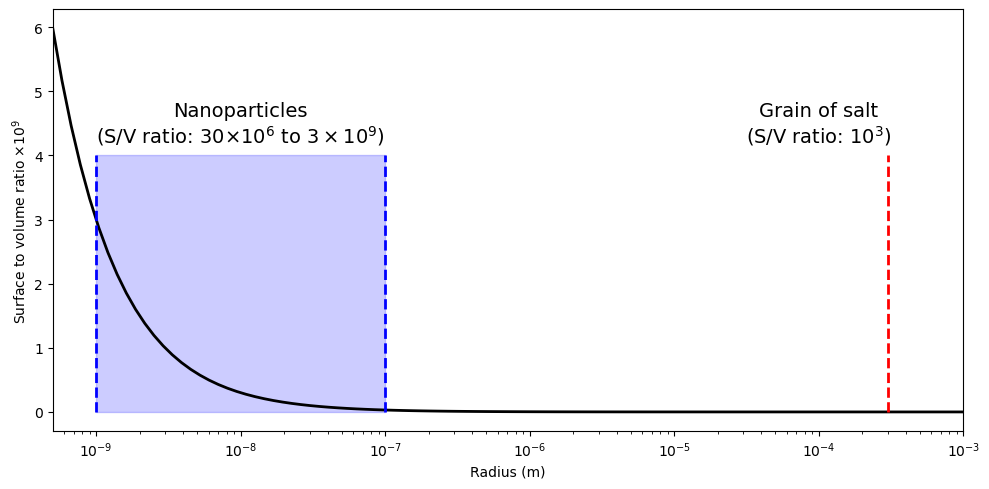

In [63]:
# Make a plot of the surface to volume ratio for different radii
# The x-axis should be on a reversed log scale

# Define the radii to plot
radii = np.logspace(-9.3, -3, 100)

# Calculate the surface to volume ratio
surface_volume_ratio = surface_to_volume_ratio(radii)

# Convert to y-scale to 10^9
surface_volume_ratio = surface_volume_ratio * 1e-9

# Plot the surface to volume ratio
plt.figure(figsize=(10, 5))
plt.plot(radii, surface_volume_ratio, color='black', lw=2)
plt.xscale('log')
plt.xlim([radii.min(), radii.max()])
plt.xlabel('Radius (m)')
plt.ylabel(r'Surface to volume ratio $\times 10^9$')

# Add a vertical line at 0.3 mm (0.3e-3 m) and label it "Grain of salt" using annotate
plt.vlines(0.3e-3, 0, 4, linestyles='dashed', label='Grain of salt', lw=2, color='red')
plt.annotate('Grain of salt\n(S/V ratio: 10$^{3}$)', (0.1e-3, 4.2), fontsize=14, ha='center')

# Add an interval from 1e-9 to 1e-7 m and label it "Nanoparticles" using annotate
plt.vlines(1e-9, 0, 4, linestyles='dashed', label='Nanoparticles', lw=2, color='blue')
plt.vlines(1e-7, 0, 4, linestyles='dashed', lw=2, color='blue')
# Add a shaded area between the two vertical lines
plt.fill_between([1e-9, 1e-7], 0, 4, color='blue', alpha=0.2)
# Add a label to the shaded area
plt.annotate('Nanoparticles\n'+r'(S/V ratio: 30$\times 10^6$ to $3\times 10^9$)', (1e-8, 4.2), fontsize=14, ha='center')
plt.tight_layout()
# plt.savefig('./test_SurfaceVolumeRatio.png', dpi=300)
plt.show()

In [12]:
radii

array([1.00000000e+00, 7.92482898e-01, 6.28029144e-01, 4.97702356e-01,
       3.94420606e-01, 3.12571585e-01, 2.47707636e-01, 1.96304065e-01,
       1.55567614e-01, 1.23284674e-01, 9.77009957e-02, 7.74263683e-02,
       6.13590727e-02, 4.86260158e-02, 3.85352859e-02, 3.05385551e-02,
       2.42012826e-02, 1.91791026e-02, 1.51991108e-02, 1.20450354e-02,
       9.54548457e-03, 7.56463328e-03, 5.99484250e-03, 4.75081016e-03,
       3.76493581e-03, 2.98364724e-03, 2.36448941e-03, 1.87381742e-03,
       1.48496826e-03, 1.17681195e-03, 9.32603347e-04, 7.39072203e-04,
       5.85702082e-04, 4.64158883e-04, 3.67837977e-04, 2.91505306e-04,
       2.31012970e-04, 1.83073828e-04, 1.45082878e-04, 1.14975700e-04,
       9.11162756e-05, 7.22080902e-05, 5.72236766e-05, 4.53487851e-05,
       3.59381366e-05, 2.84803587e-05, 2.25701972e-05, 1.78864953e-05,
       1.41747416e-05, 1.12332403e-05, 8.90215085e-06, 7.05480231e-06,
       5.59081018e-06, 4.43062146e-06, 3.51119173e-06, 2.78255940e-06,
      

In [5]:
dataset1 = InOrgMatDatasets('COD_subset_v4', root='./Dataset/')
# dataset1.create_data_split()
# dataset1.create_data_split(split_strategy='stratified', stratify_on='Crystal system (Number)')
# dataset1.create_data_split(split_strategy='stratified', stratify_on='Crystal system (Number)', stratify_distribution='equal')

dataset2 = InOrgMatDatasets('Simulated_rmax60_v4', root='./Dataset/')
# dataset2.create_data_split()
# dataset2.create_data_split(split_strategy='stratified', stratify_on='Crystal system (Number)')
# dataset2.create_data_split(split_strategy='stratified', stratify_on='Crystal system (Number)', stratify_distribution='equal')

In [3]:
# import subprocess
# from pathlib import Path

# # Define the command line commands
# paths = ['./' + str(config_file) for config_file in Path('./benchmark_configs/').glob('*.yaml')]

# commands = [f'python benchmarking.py --config={path}' for path in paths]

# # Run the commands
# for command in commands:
#     subprocess.run(command, shell=True)


In [6]:
dataset1.load_data_split()
# dataset1.load_data_split(split_strategy='stratified', stratify_on='Crystal system (Number)')
# dataset1.load_data_split(split_strategy='stratified', stratify_on='Crystal system (Number)', stratify_distribution='equal')
dataset2.load_data_split()
# dataset2.load_data_split(split_strategy='stratified', stratify_on='Crystal system (Number)')
# dataset2.load_data_split(split_strategy='stratified', stratify_on='Crystal system (Number)', stratify_distribution='equal')

In [50]:
# idx = 1
# print(dataset.len())
# print(dataset.get(idx).y['atomic_species'])
# print(dataset.get(idx))

In [51]:
# print(dataset.len(split='train'), dataset.len(split='validation'), dataset.len(split='test'))
# dataset.get(1, split='test')

In [88]:
dataset2.get(2, split='train')

Data(
  x=[1625, 4],
  edge_index=[2, 12560],
  edge_attr=[12560],
  y={
    crystal_type='AntiFluorite',
    space_group_symbol='F m -3 m',
    space_group_number=225,
    crystal_system='Cubic',
    crystal_system_number=6,
    atomic_species=[2],
    n_atomic_species=2,
    np_size=33.42735290527344,
    n_atoms=1625,
    n_bonds=12560,
    cell_params=[6],
    unit_cell_node_feat=[12, 4],
    unit_cell_edge_index=[2, 88],
    unit_cell_edge_feat=[88],
    unit_cell_pos_abs=[12, 3],
    unit_cell_pos_frac=[12, 3],
    nd=[2, 580],
    xrd=[2, 580],
    nPDF=[2, 6000],
    xPDF=[2, 6000],
    sans=[2, 300],
    saxs=[2, 300],
  },
  pos_frac=[1625, 3],
  pos_abs=[1625, 3]
)

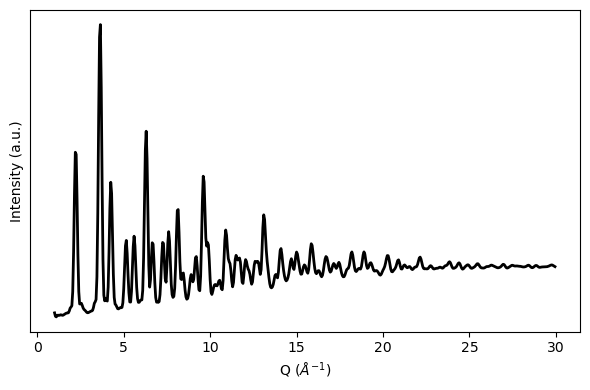

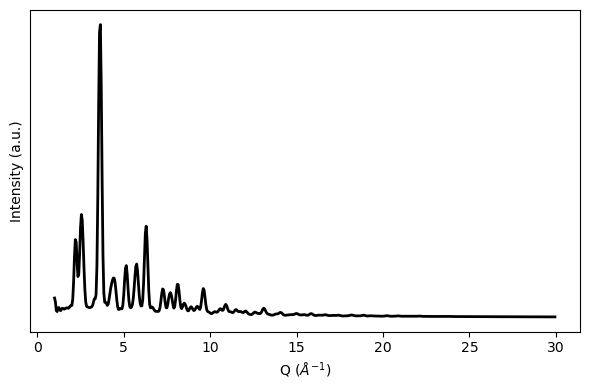

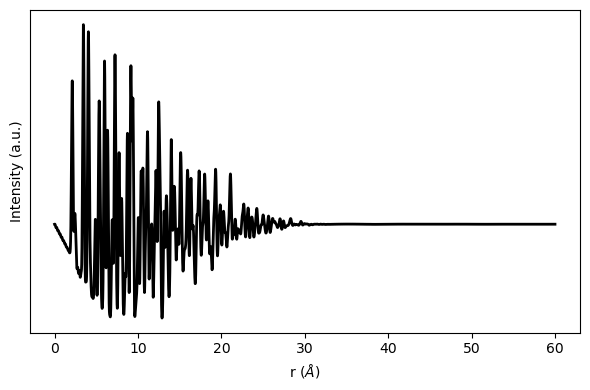

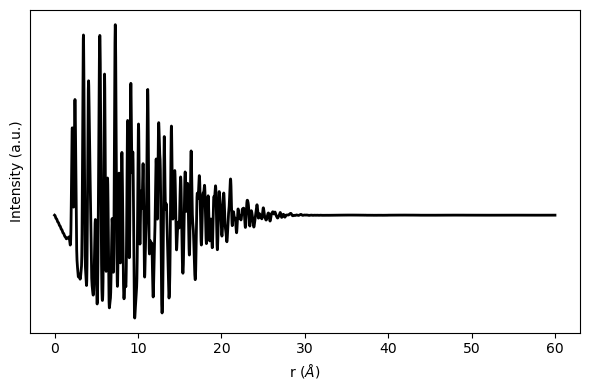

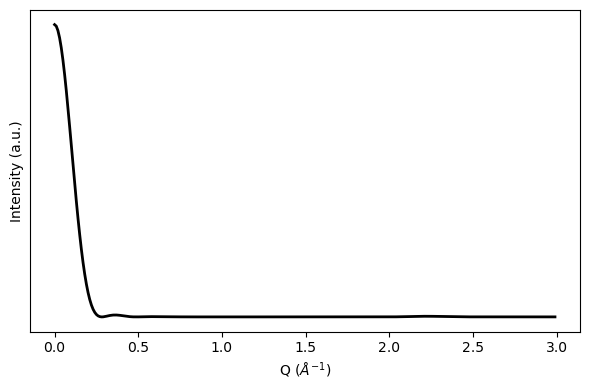

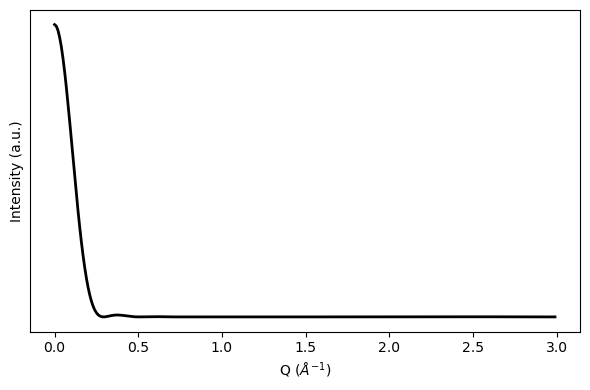

In [90]:
datapoint = dataset2.get(2, split='train')

# Plot the nd of sample 0 from the training split
plt.figure(figsize=(6, 4))
plt.plot(*datapoint.y['nd'], color='black', lw=2)
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.yticks([])
plt.tight_layout()
# plt.savefig('./test_nd.png', dpi=300)
plt.show()

# Plot the xrd of sample 0 from the training split
plt.figure(figsize=(6, 4))
plt.plot(*datapoint.y['xrd'], color='black', lw=2)
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.yticks([])
plt.tight_layout()
# plt.savefig('./test_xrd.png', dpi=300)
plt.show()

# Plot the nPDF of sample 0 from the training split
plt.figure(figsize=(6, 4))
plt.plot(*datapoint.y['nPDF'], color='black', lw=2)
plt.xlabel('r ($\AA$)')
plt.ylabel('Intensity (a.u.)')
plt.yticks([])
plt.tight_layout()
# plt.savefig('./test_nPDF.png', dpi=300)
plt.show()

# Plot the xPDF of sample 0 from the training split  
plt.figure(figsize=(6, 4))
plt.plot(*datapoint.y['xPDF'], color='black', lw=2)
plt.xlabel('r ($\AA$)')
plt.ylabel('Intensity (a.u.)')
plt.yticks([])
plt.tight_layout()
# plt.savefig('./test_xPDF.png', dpi=300)
plt.show()

# Plot the sans of sample 0 from the training split
plt.figure(figsize=(6, 4))
plt.plot(*datapoint.y['sans'], color='black', lw=2)
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.yticks([])
plt.tight_layout()
# plt.savefig('./test_sans.png', dpi=300)
plt.show()

# Plot the saxs of sample 0 from the training split
plt.figure(figsize=(6, 4))
plt.plot(*datapoint.y['saxs'], color='black', lw=2)
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.yticks([])
plt.tight_layout()
# plt.savefig('./test_saxs.png', dpi=300)
plt.show()


## Create .xyz file

In [52]:
# # Loop over all indices in the dataset
# for idx in tqdm(range(dataset.len())):
#     # Get the sample at an index
#     # idx = 9
#     sample = dataset.get(idx)

#     # Extract the absolute coordinates and atomic numbers
#     coords = sample.pos_abs.numpy()
#     atomic_numbers = sample.x[:,0].numpy().astype(int)
#     n_atoms = sample.y['n_atoms']

#     # Write the .xyz file
#     with open(f'./Dataset/xyz/SimulatedTest2/{idx}.xyz', 'w') as f:
#         f.write(f'{n_atoms}\n')
#         f.write('\n')
#         for i in range(n_atoms):
#             f.write(f'{element(int(atomic_numbers[i])).symbol} {coords[i,0]} {coords[i,1]} {coords[i,2]}\n')


## Plotting and statistics

In [53]:
# plt.figure(figsize=(10, 6))
# plt.plot(*dataset.get(540, split='train').y['xPDF'])
# plt.ylabel('Intensity (a.u.)')
# plt.xlabel('r ($\AA$)')
# plt.show()

In [7]:
stats1 = dataset1.get_statistics(return_dataframe=True)
stats1.describe()

idx     # of nodes     # of edges  # of elements  \
count  104408.00000  104408.000000  104408.000000  104408.000000   
mean    52203.50000    1756.555657   11989.898906       3.091545   
std     30140.13779    1953.853971   15812.666313       0.865582   
min         0.00000       2.000000       2.000000       1.000000   
25%     26101.75000     238.000000    1044.000000       3.000000   
50%     52203.50000    1054.000000    5336.000000       3.000000   
75%     78305.25000    2795.000000   17400.000000       4.000000   
max    104407.00000   21427.000000  413762.000000       7.000000   

       Space group (Number)  Crystal system (Number)    NP size (Å)  
count         104408.000000            104408.000000  104408.000000  
mean              82.521694                 2.512193      33.502831  
std               78.002584                 1.844425      14.816398  
min                1.000000                 0.000000       2.793175  
25%               14.000000                 1.000000      22.769300  
50%               62.000000                 2.000000      34.214622  
75%              140.000000                 3.000000      45.344866  
max              229.000000                 6.000000      59.437626

In [8]:
print(dataset1.len(split='train'))
print(dataset1.len(split='validation'))
print(dataset1.len(split='test'))

83526
10441
10441


In [17]:
total_nodes_1 = stats1['# of nodes'].sum()
total_edges_1 = stats1['# of edges'].sum()
print(f'Total number of nodes: {total_nodes_1}')
print(f'Total number of edges: {total_edges_1}')

Total number of nodes: 183398463.0
Total number of edges: 1251841365.0


In [9]:
stats2 = dataset2.get_statistics(return_dataframe=True)
stats2.describe()

idx    # of nodes     # of edges  # of elements  \
count  3180.000000   3180.000000    3180.000000         3180.0   
mean   1589.500000   2188.391509   15605.169811            2.0   
std     918.131254   2319.871145   19372.138747            0.0   
min       0.000000      7.000000       7.000000            2.0   
25%     794.750000    367.000000    1560.000000            2.0   
50%    1589.500000   1377.000000    7212.000000            2.0   
75%    2384.250000   3428.000000   23712.000000            2.0   
max    3179.000000  14793.000000  118258.000000            2.0   

       Space group (Number)  Crystal system (Number)  NP size (Å)  
count           3180.000000               3180.00000  3180.000000  
mean             151.583333                  4.25000    33.304232  
std               89.485164                  2.12656    14.699663  
min               12.000000                  1.00000     7.363739  
25%               56.250000                  2.00000    22.601038  
50%              218.500000                  6.00000    33.498924  
75%              225.000000                  6.00000    44.043523  
max              227.000000                  6.00000    56.690269

In [10]:
print(dataset2.len(split='train'))
print(dataset2.len(split='validation'))
print(dataset2.len(split='test'))

2544
318
318


In [21]:
total_nodes_2 = stats2['# of nodes'].sum()
total_edges_2 = stats2['# of edges'].sum()
print(f'Total number of nodes: {total_nodes_2}')
print(f'Total number of edges: {total_edges_2}')

Total number of nodes: 6959085.0
Total number of edges: 49624440.0


In [11]:
# Combine the statistics of the two datasets
stats1['dataset'] = 'COD_subset_v4'
stats2['dataset'] = 'Simulated_rmax60_v4'
combined_stats = pd.concat([stats1, stats2]).reset_index(drop=True)
combined_stats.head()

idx  # of nodes  # of edges  # of elements Space group (Symbol)  \
0  64233        51.0       228.0            2.0             F m -3 m   
1  70267      4476.0     23722.0            4.0                 P 21   
2  86737      6941.0     61248.0            3.0             F d -3 m   
3  45325       365.0      1546.0            2.0              A m a 2   
4  63436      3279.0     24632.0            4.0              P n m a   

   Space group (Number) Crystal type Crystal system  Crystal system (Number)  \
0                 225.0      Unknown          Cubic                        6   
1                   4.0      Unknown     Monoclinic                        1   
2                 227.0      Unknown          Cubic                        6   
3                  40.0      Unknown   Orthorhombic                        2   
4                  62.0      Unknown   Orthorhombic                        2   

   NP size (Å)                                           Elements  \
0    15.799050                         [tensor(19.), tensor(53.)]   
1    57.368690  [tensor(8.), tensor(21.), tensor(34.), tensor(...   
2    53.324833             [tensor(8.), tensor(12.), tensor(24.)]   
3    23.532887                         [tensor(29.), tensor(34.)]   
4    44.432549  [tensor(8.), tensor(12.), tensor(14.), tensor(...   

  Stratified data split (Crystal system (Number), Equal classes)  \
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4                                                                  

  Random data split Stratified data split (Crystal system (Number))  \
0             Train                                           Train   
1             Train                                           Train   
2             Train                                           Train   
3             Train                                           Train   
4             Train                                           Train   

         dataset  
0  COD_subset_v4  
1  COD_subset_v4  
2  COD_subset_v4  
3  COD_subset_v4  
4  COD_subset_v4

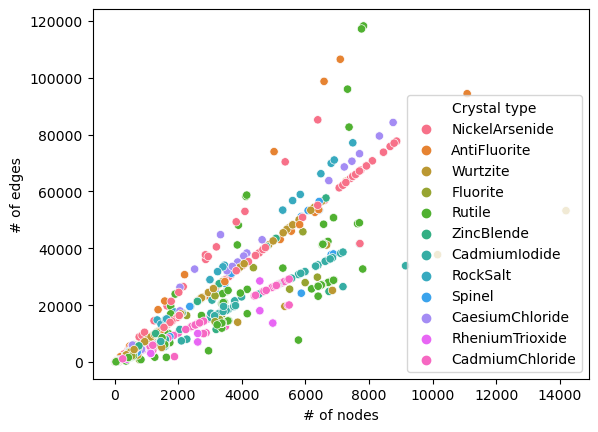

In [9]:
sns.scatterplot(data=stats2, x='# of nodes', y='# of edges', hue='Crystal type')
plt.show()

In [10]:
palette = sns.color_palette('tab10')
color_dict = {'Train': palette[0], 'Validation': palette[1], 'Test': palette[2]}
hue_order = ['Train', 'Validation', 'Test']

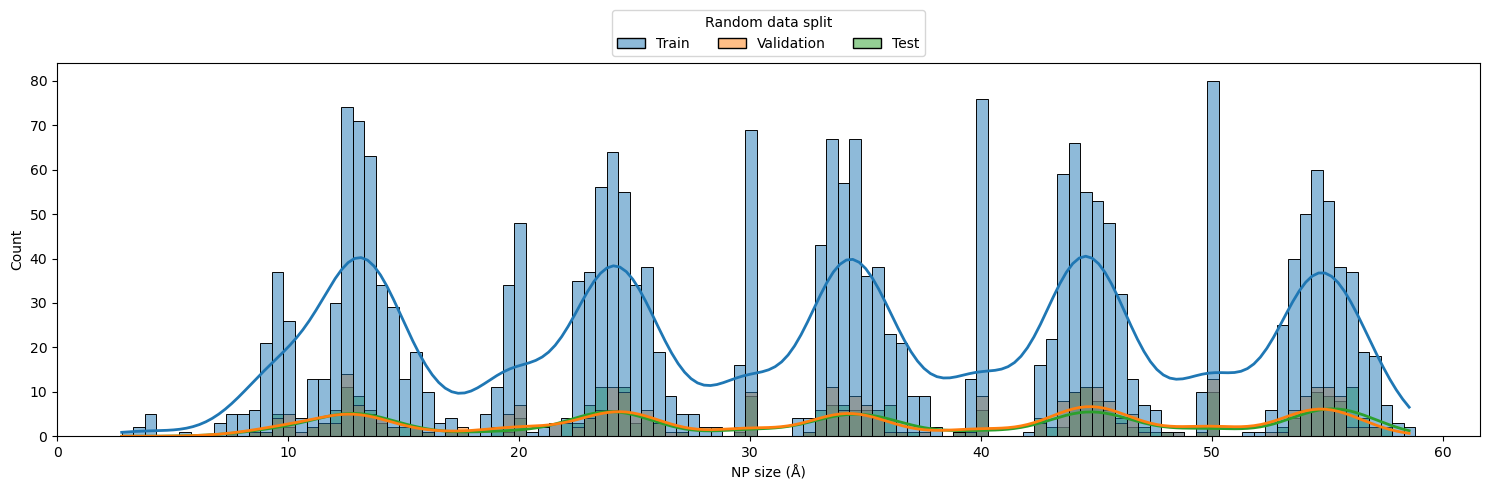

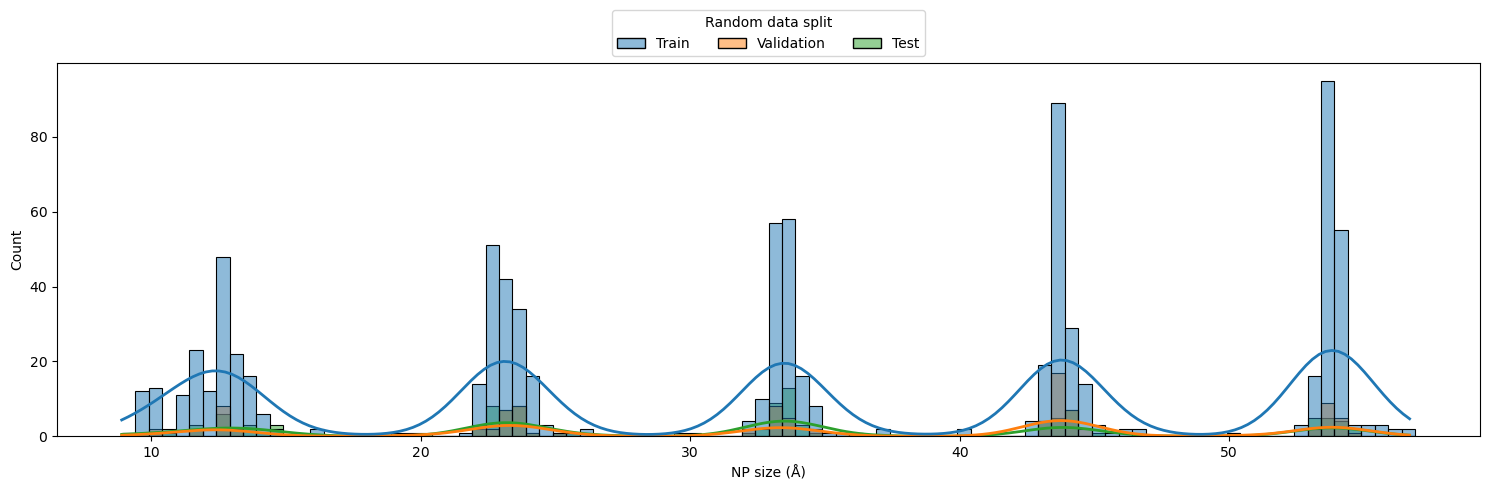

In [14]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data=stats1, x='NP size (Å)', binwidth=0.5, hue='Random data split', multiple='layer',kde=True, kde_kws=dict(bw_method=0.1), line_kws=dict(linewidth=2), stat='count', palette=color_dict, hue_order=hue_order)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
# plt.savefig('./test_stats_sizeDist.png', format='png', dpi=300)
plt.show()

plt.figure(figsize=(15,5))
ax = sns.histplot(data=stats2, x='NP size (Å)', binwidth=0.5, hue='Random data split', multiple='layer',kde=True, kde_kws=dict(bw_method=0.1), line_kws=dict(linewidth=2), stat='count', palette=color_dict, hue_order=hue_order)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
# plt.savefig('./test_stats_sizeDist.png', format='png', dpi=300)
plt.show()

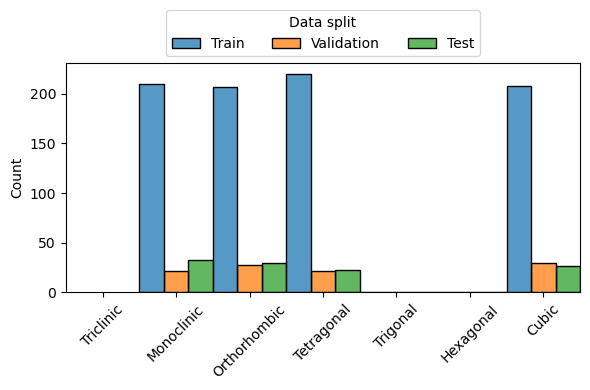

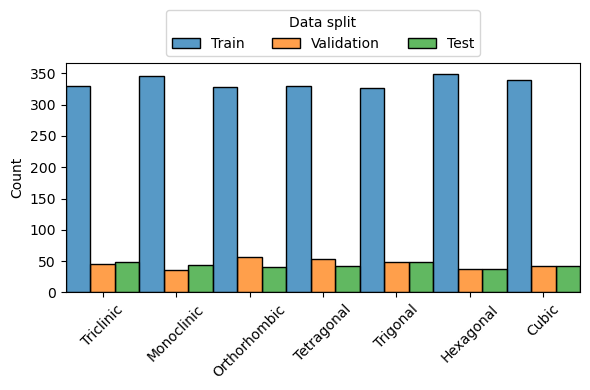

In [15]:
plt.figure(figsize=(6,4))
ax = sns.histplot(data=stats2, x='Crystal system (Number)', hue='Random data split', multiple='dodge', palette=color_dict, hue_order=hue_order, discrete=True)
# ax = sns.histplot(data=stats, x='Crystal type', hue='Stratified data split (Crystal type)', multiple='dodge', palette=color_dict, hue_order=hue_order)
# Change legend title
new_title = 'Data split'
ax.legend_.set_title(new_title)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.xlim(-0.5, 6.5)
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic'], rotation=45)
# plt.xlabel('Crystal system')
plt.xlabel('')
plt.tight_layout()
# plt.savefig('./test_stats_crystalSystem_sim.pdf', format='pdf', dpi=300)
plt.show()

plt.figure(figsize=(6,4))
ax = sns.histplot(data=stats1, x='Crystal system (Number)', hue='Random data split', multiple='dodge', palette=color_dict, hue_order=hue_order, discrete=True)
# ax = sns.histplot(data=stats, x='Crystal type', hue='Stratified data split (Crystal type)', multiple='dodge', palette=color_dict, hue_order=hue_order)
# Change legend title
new_title = 'Data split'
ax.legend_.set_title(new_title)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.xlim(-0.5, 6.5)
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic'], rotation=45)
# plt.xlabel('Crystal system')
plt.xlabel('')
plt.tight_layout()
# plt.savefig('./test_stats_crystalSystem_COD.pdf', format='pdf', dpi=300)
plt.show()


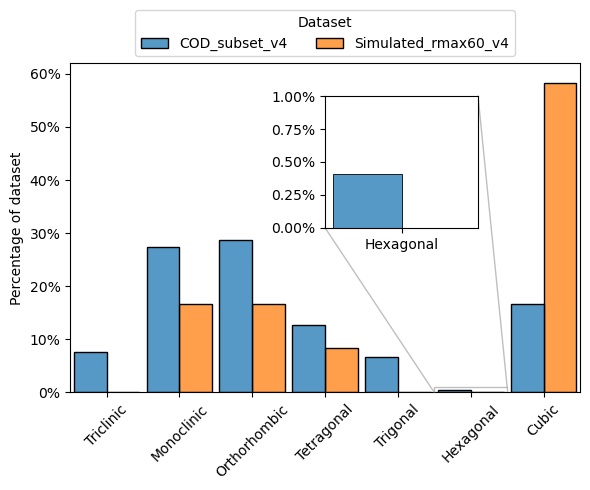

In [31]:
# Histogram comparing the crystal systems of the two datasets
plt.figure(figsize=(6,5))
ax = sns.histplot(data=combined_stats, x='Crystal system (Number)', hue='dataset', multiple='dodge', discrete=True, stat='percent', palette=palette, common_norm=False, shrink=0.9)
# Change legend title
new_title = 'Dataset'
ax.legend_.set_title(new_title)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)
ax.set_xlim(-0.5, 6.5)
ax.set_xticks(ticks=[0,1,2,3,4,5,6], labels=['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic'], rotation=45)
# plt.xlabel('Crystal system')
ax.set_xlabel('')
ax.set_ylabel('Percentage of dataset')
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%'])
ax.set_ylim(0, 62)

# Make inset plot of the hexagonal system
# ax2 = plt.axes([0,0,0.2,0.2])
ip = ax.inset_axes([0.5,0.5,0.3,0.4])
sns.histplot(data=combined_stats, x='Crystal system (Number)', hue='dataset', multiple='dodge', discrete=True, stat='percent', palette=palette, common_norm=False, ax=ip, shrink=0.9)
ip.set_xlim(4.5, 5.5)
ip.set_ylim(0, 1)
ip.set_xticks(ticks=[5], labels=['Hexagonal'])
ip.set_yticks([0, 0.25, 0.5, 0.75, 1], ['0.00%', '0.25%', '0.50%', '0.75%', '1.00%'])
# ip.set_yticklabels([])
ip.set_xlabel('')
ip.set_ylabel('')
ip.set_title('')
ip.set_facecolor('white')
ip.legend_.remove()
ax.indicate_inset_zoom(ip)

plt.tight_layout()
# plt.savefig('./test_stats_crystalSystem_comparison.pdf', format='pdf', dpi=300)
plt.show()

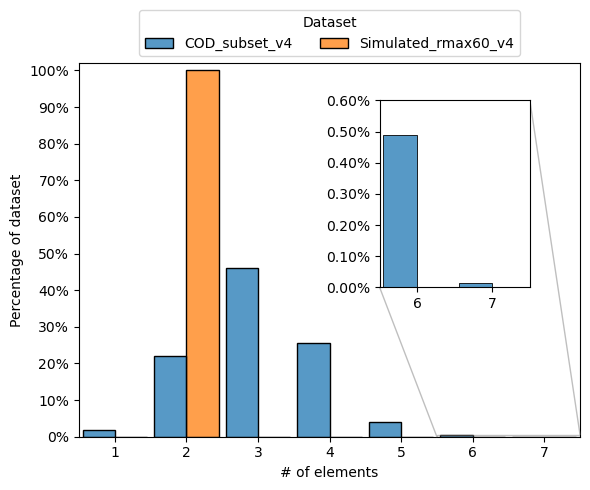

In [124]:
# Histogram comparing the number of elements of the two datasets
plt.figure(figsize=(6,5))
ax = sns.histplot(data=combined_stats, x='# of elements', hue='dataset', multiple='dodge', discrete=True, stat='percent', palette=palette, common_norm=False, shrink=0.9)
# Change legend title
new_title = 'Dataset'
ax.legend_.set_title(new_title)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)
ax.set_xlim(0.5, 7.5)
# ax.set_xticks(ticks=[0,1,2,3,4,5,6], labels=['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic'], rotation=45)
ax.set_xlabel('# of elements')
# ax.set_xlabel('')
ax.set_ylabel('Percentage of dataset')
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
ax.set_ylim(0, 102)

# Make inset plot of 6 and 7 elements
ip = ax.inset_axes([0.6,0.4,0.3,0.5])
sns.histplot(data=combined_stats, x='# of elements', hue='dataset', multiple='dodge', discrete=True, stat='percent', palette=palette, common_norm=False, ax=ip, shrink=0.9)
ip.set_xlim(5.5, 7.5)
ip.set_ylim(0, 0.6)

ip.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], ['0.00%', '0.10%', '0.20%', '0.30%', '0.40%', '0.50%', '0.60%'])
# ip.set_yticklabels([])
ip.set_xlabel('')
ip.set_ylabel('')
ip.set_title('')
ip.set_facecolor('white')
ip.legend_.remove()
ax.indicate_inset_zoom(ip)

plt.tight_layout()
# plt.savefig('./test_stats_nElements_comparison.pdf', format='pdf', dpi=300)
plt.show()

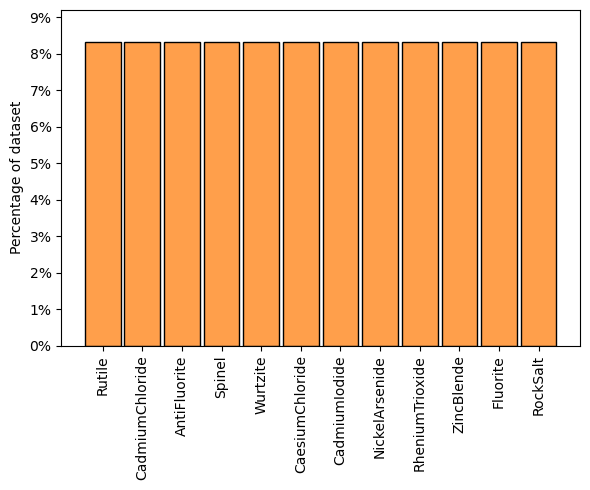

In [43]:
# Histogram showing the distribution of crystal types in dataset2
plt.figure(figsize=(6,5))
ax = sns.histplot(data=stats2, x='Crystal type', discrete=True, stat='percent', color=palette[1], shrink=0.9)
# ax.set_xlim(0.5, 7.5)
# ax.set_xticks(ticks=[0,1,2,3,4,5,6], labels=['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic'], rotation=45)
ax.set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=stats2['Crystal type'].unique(),rotation=90)
# ax.set_xlabel('# of elements')
ax.set_xlabel('')
ax.set_ylabel('Percentage of dataset')
ax.set_yticks([0, 1, 2, 3 ,4, 5, 6, 7, 8, 9], ['0%', '1%', '2%', '3%', '4%', '5%', '6%', '7%', '8%', '9%'])
ax.set_ylim(0, 9.2)

plt.tight_layout()
# plt.savefig('./test_stats_CrystalType_sim.pdf', format='pdf', dpi=300)
plt.show()

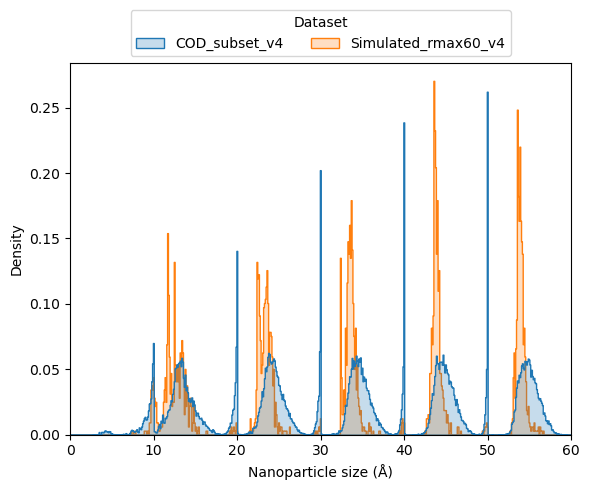

In [49]:
# Histogram comparing the distribution of NP sizes in the two datasets
plt.figure(figsize=(6,5))
ax = sns.histplot(data=combined_stats, x='NP size (Å)', hue='dataset', multiple='layer', discrete=False, stat='density', palette=palette, common_norm=False, shrink=1, binwidth=0.1, binrange=(0,60), element='step')
# Change legend title
new_title = 'Dataset'
ax.legend_.set_title(new_title)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)
ax.set_xlim(0, 60)
# # ax.set_xticks(ticks=[0,1,2,3,4,5,6], labels=['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic'], rotation=45)
# # ax.set_xlabel('# of elements')
ax.set_xlabel('Nanoparticle size (Å)')
ax.set_ylabel('Density')
# ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70], ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%'])
# ax.set_ylim(0, 72)

# # Make inset plot of 6 and 7 elements
# ip = ax.inset_axes([0.6,0.4,0.3,0.5])
# sns.histplot(data=combined_stats, x='NP size (Å)', hue='dataset', multiple='dodge', discrete=True, stat='percent', palette=palette, common_norm=False, ax=ip, shrink=0.9)
# ip.set_xlim(50, 60)
# ip.set_ylim(0, 0.6)

# ip.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], ['0.00%', '0.10%', '0.20%', '0.30%', '0.40%', '0.50%'])
# # ip.set_yticklabels([])
# ip.set_xlabel('')
# ip.set_ylabel('')
# ip.set_title('')
# ip.set_facecolor('white')
# ip.legend_.remove()
# ax.indicate_inset_zoom(ip)

plt.tight_layout()
# plt.savefig('./test_stats_sizes_comparison.pdf', format='pdf', dpi=300)
plt.show()

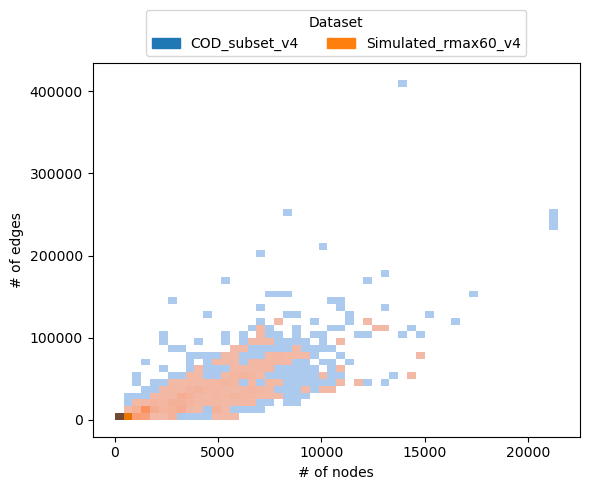

In [52]:
# 2D histogram comparing the distribution of # of nodes and # of edges in the two datasets
plt.figure(figsize=(6,5))
ax = sns.histplot(data=combined_stats, x='# of nodes', y='# of edges', hue='dataset', multiple='layer', discrete=False, stat='count', palette=palette, common_norm=False, shrink=1, bins=50)
# Change legend title
new_title = 'Dataset'
ax.legend_.set_title(new_title)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)
# ax.set_xlim(0, 200)
# ax.set_ylim(0, 1000)
ax.set_xlabel('# of nodes')
ax.set_ylabel('# of edges')
plt.tight_layout()
# plt.savefig('./test_stats_num_edges_nodes_comparison.pdf', format='pdf', dpi=300)
plt.show()

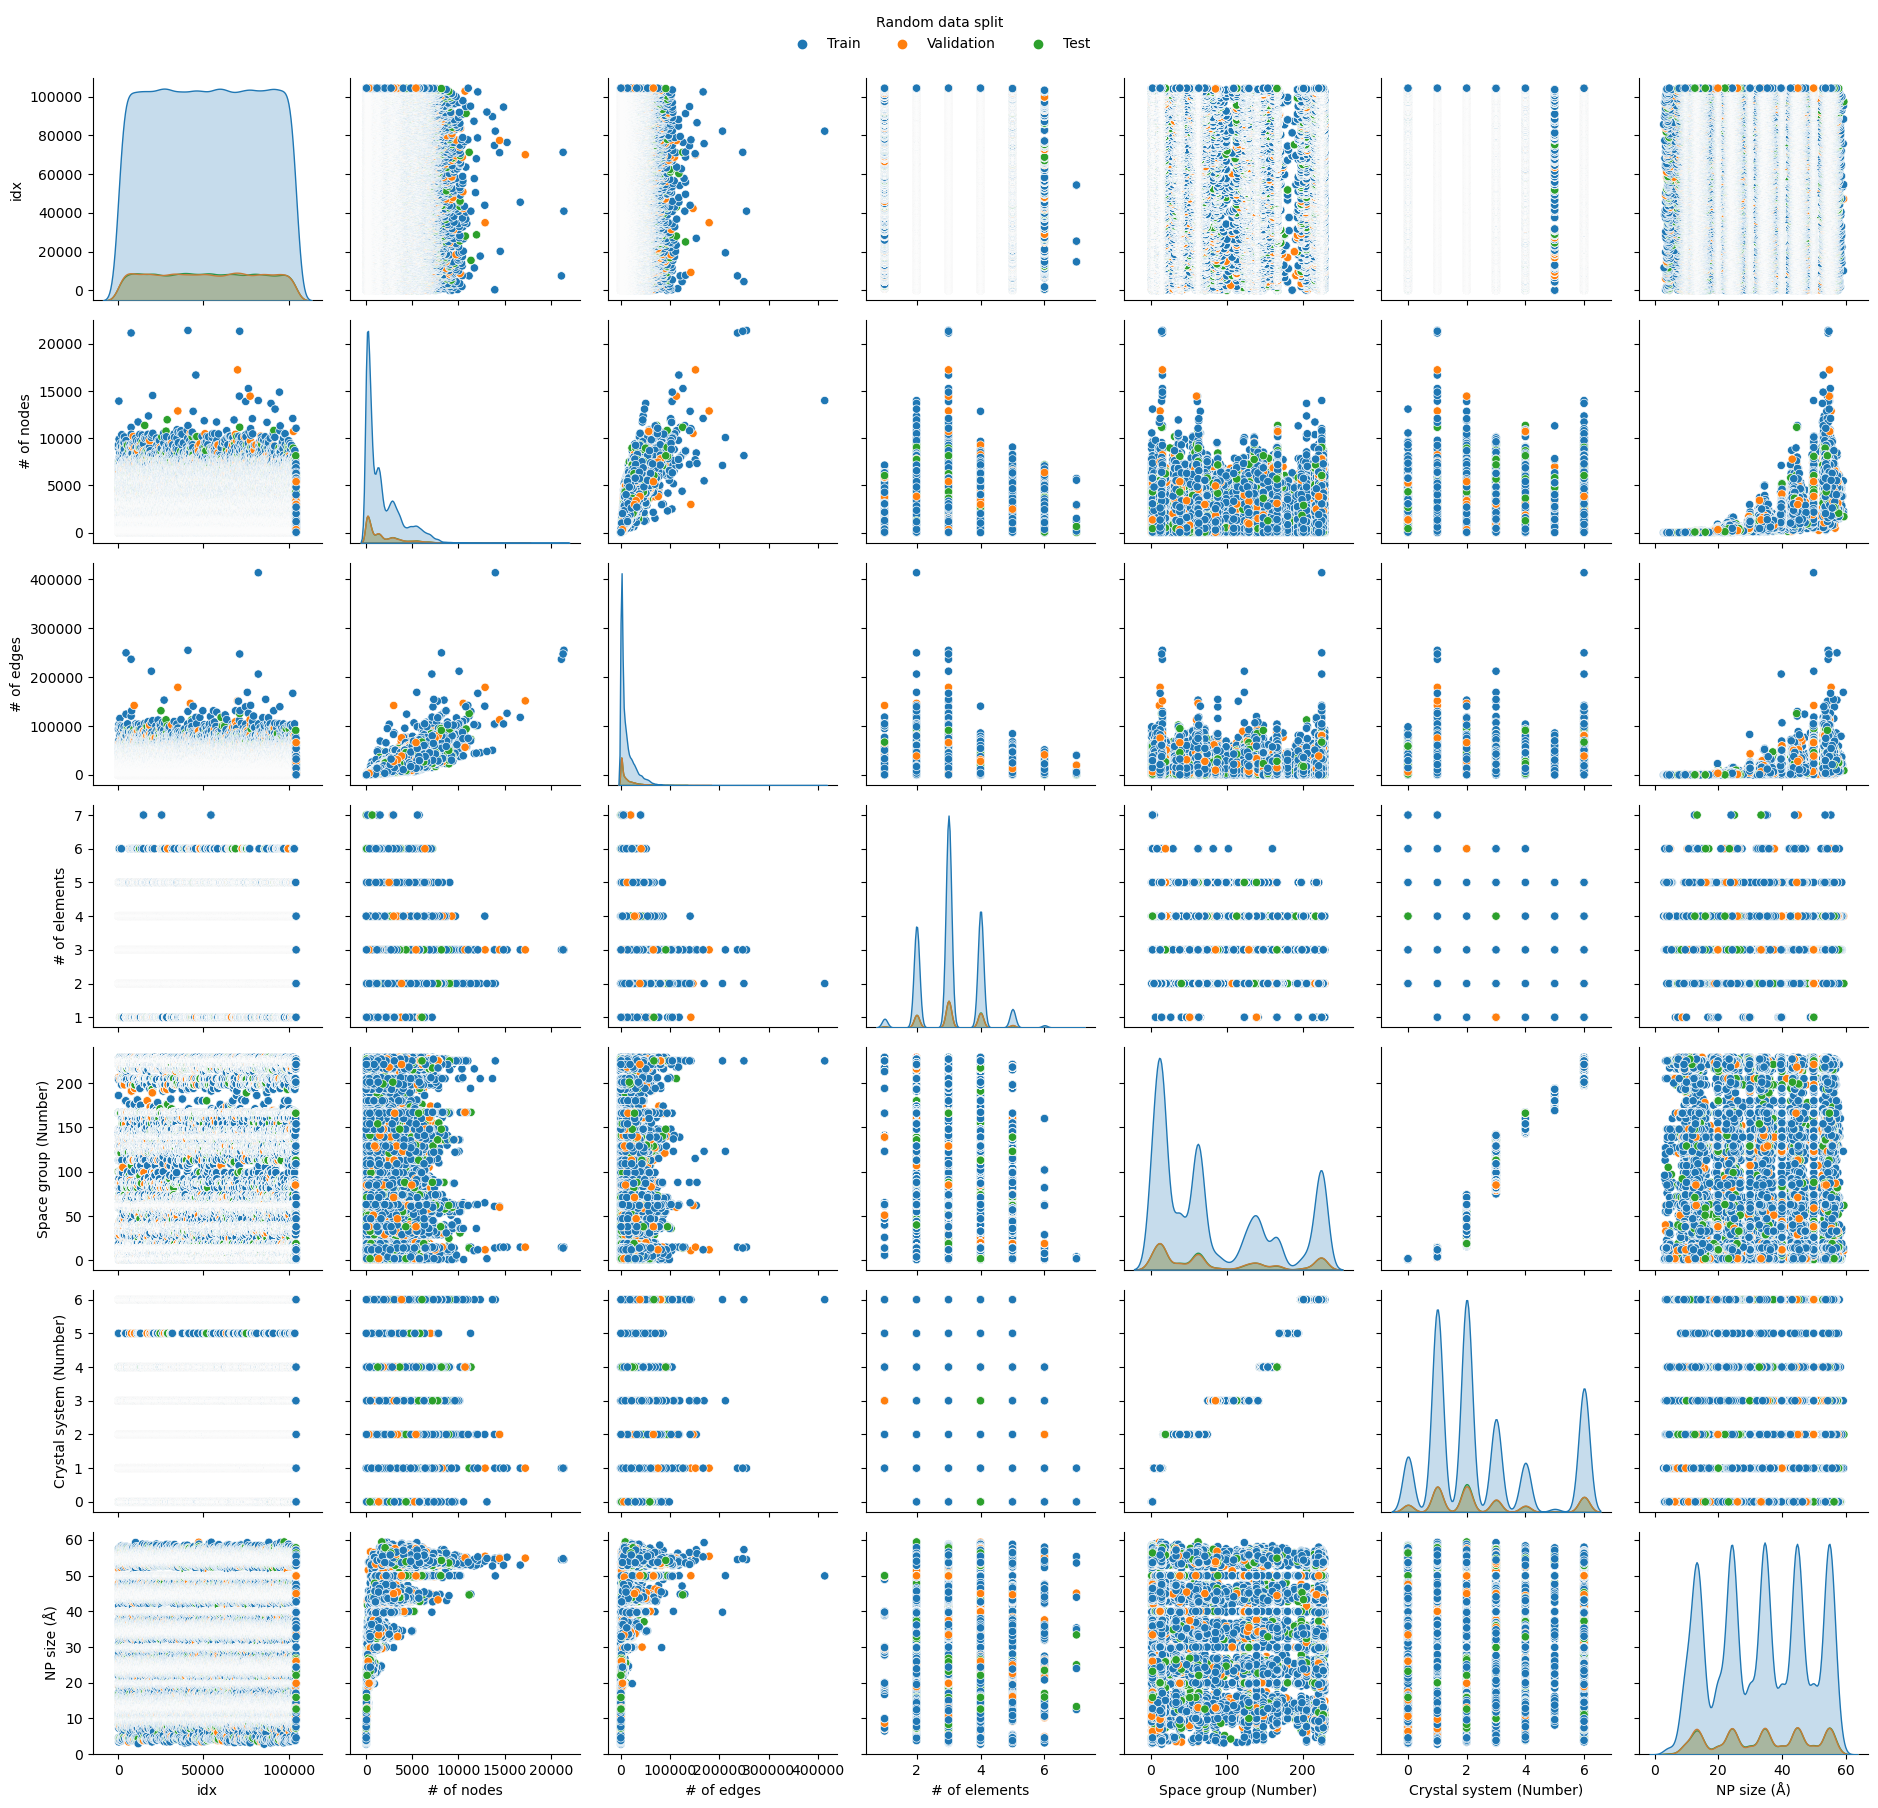

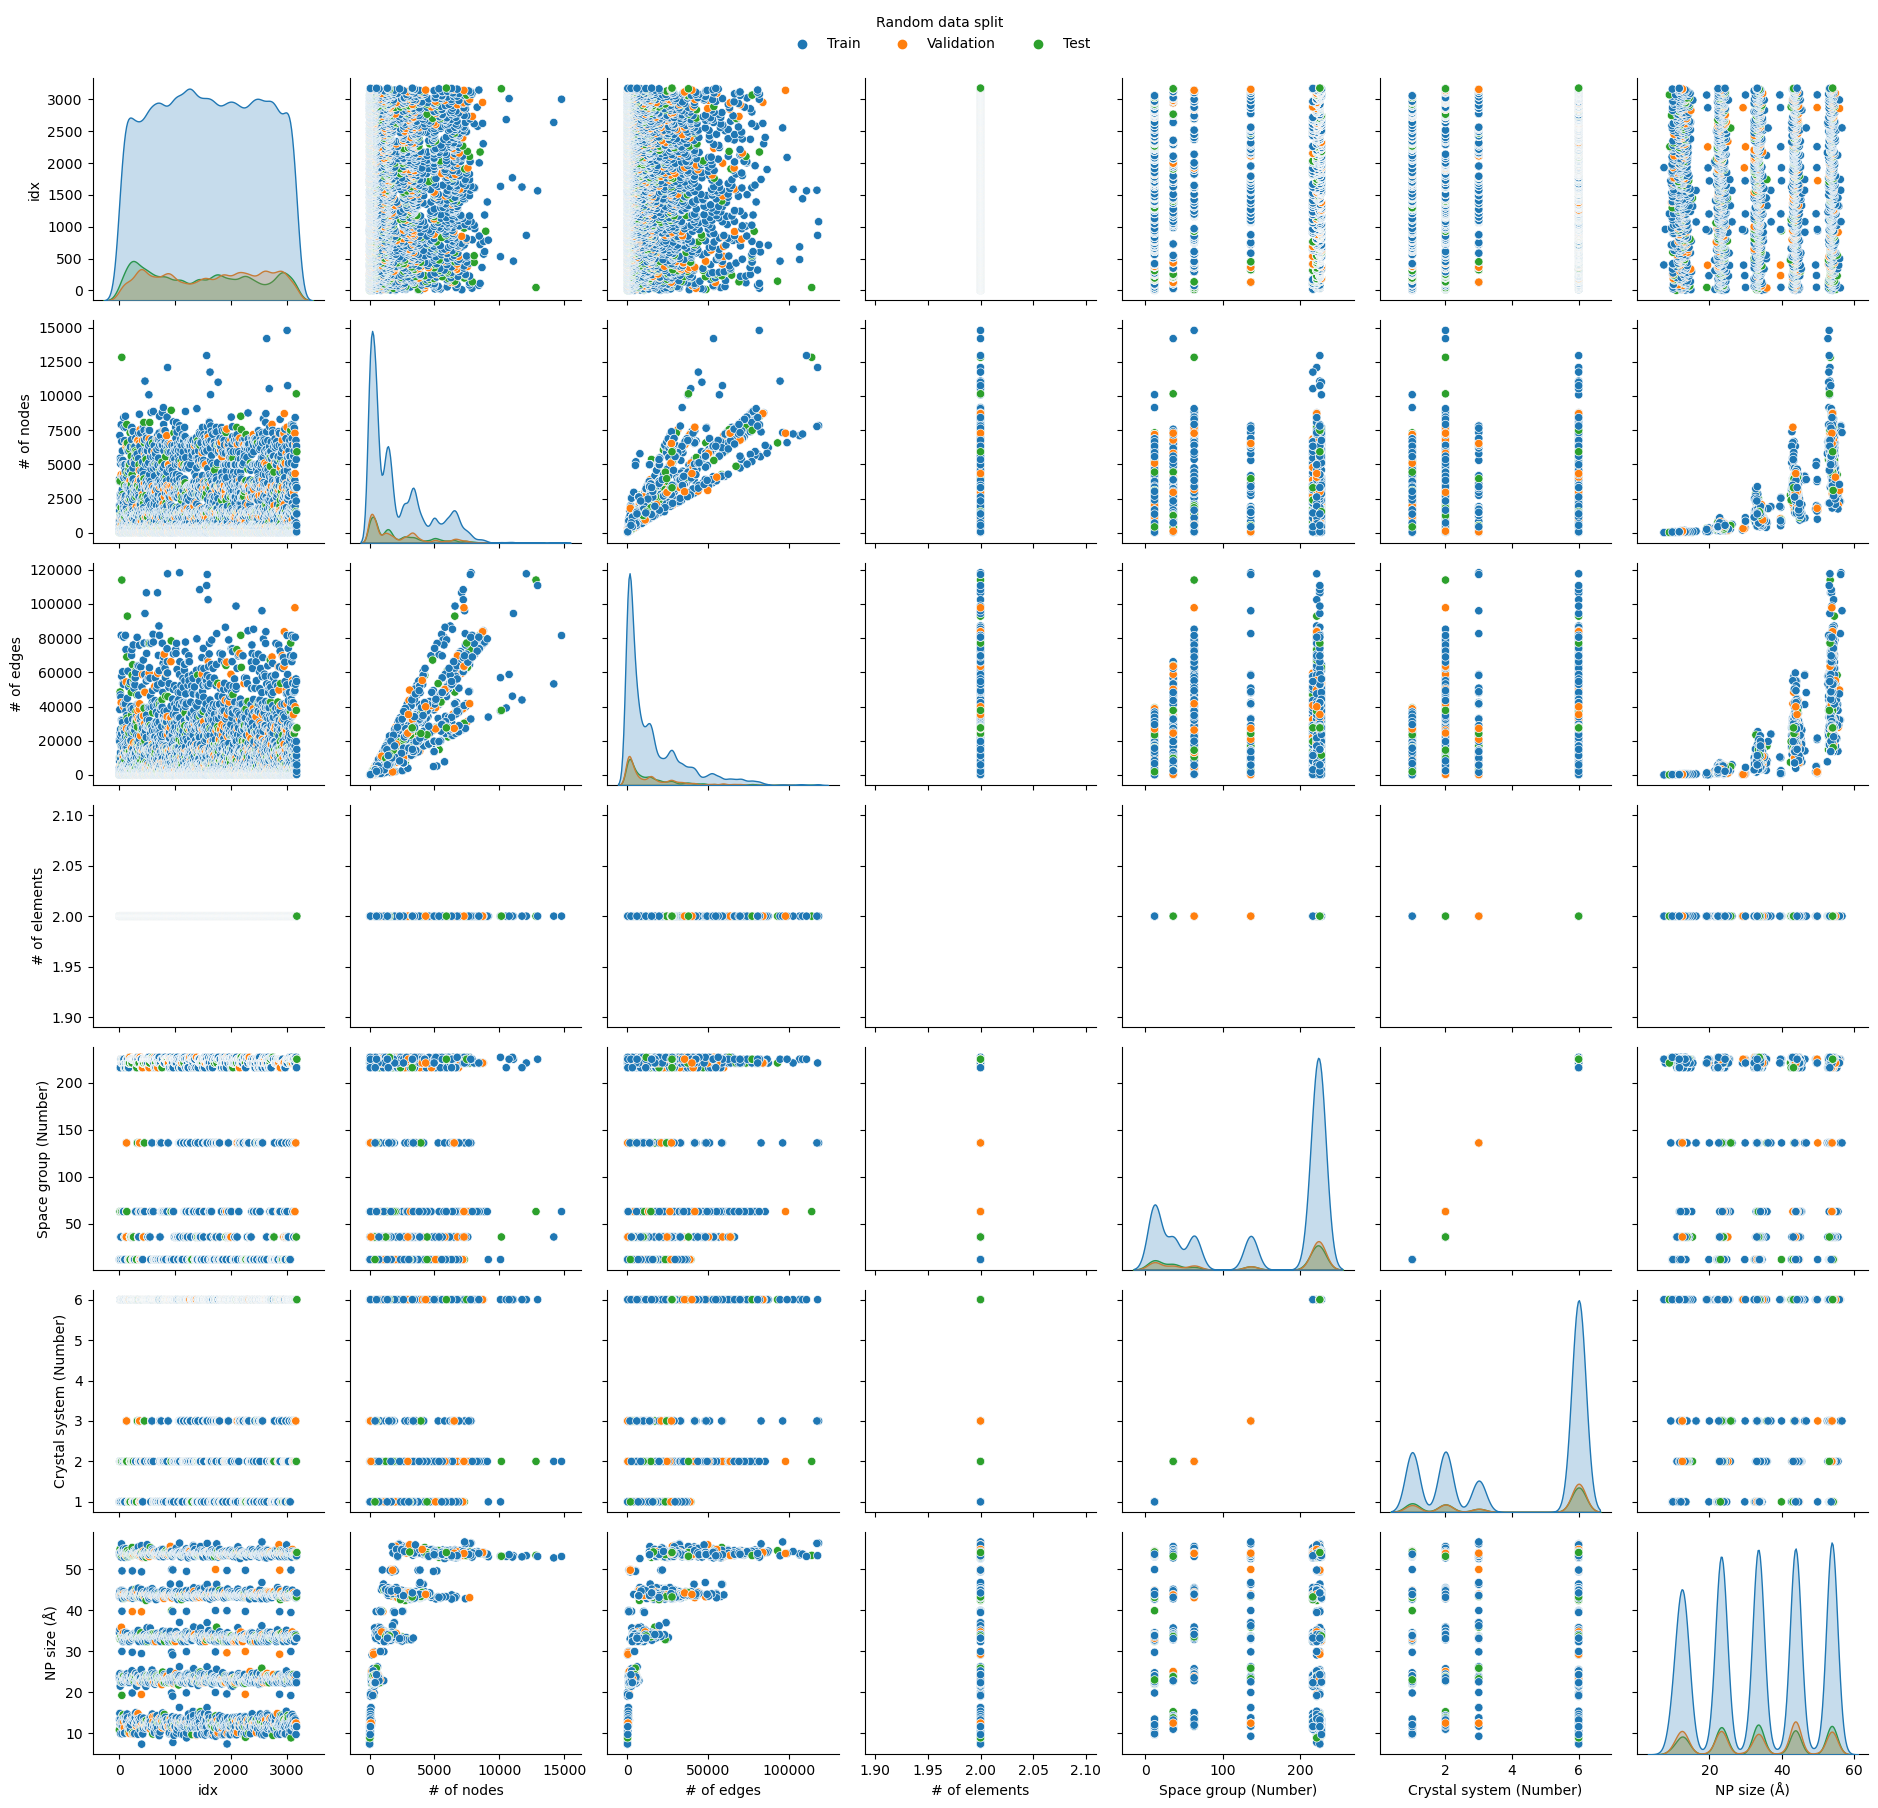

In [8]:
ax = sns.pairplot(data=stats1.drop('Elements', axis=1), hue='Random data split', diag_kws=dict(bw_method=0.1), palette=color_dict, hue_order=hue_order)
# ax = sns.pairplot(data=stats.drop('Elements', axis=1), hue='Stratified data split (Crystal type)', diag_kws=dict(bw_method=0.1), palette=color_dict, hue_order=hue_order)
# ax = sns.pairplot(data=stats.drop('Elements', axis=1), diag_kws=dict(bw_method=0.1))
# Change legend title
# new_title = 'Data split'
# ax.legend_.set_title(new_title)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
plt.savefig('./test_stats_pairplot_COD.png', format='png', dpi=300)
plt.show()

#ax = sns.pairplot(data=stats, hue='Random data split', diag_kws=dict(bw_method=0.1))
ax = sns.pairplot(data=stats2.drop('Elements', axis=1), hue='Random data split', diag_kws=dict(bw_method=0.1), palette=color_dict, hue_order=hue_order)
# ax = sns.pairplot(data=stats.drop('Elements', axis=1), diag_kws=dict(bw_method=0.1))
# Change legend title
# new_title = 'Data split'
# ax.legend_.set_title(new_title)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
plt.savefig('./test_stats_pairplot_sim.png', format='png', dpi=300)
plt.show()

# Results statistics

In [6]:
import os
import pandas as pd

# Specify the root directory
root_dir = './Results/Results_COD/COD_subset_v4/'

# Initialize an empty list to store the dataframes
dfs = []

# Traverse the directory structure
for root, dirs, files in os.walk(root_dir):
    # Iterate over the files in the current directory
    for file in files:
        # Check if the file is a CSV file
        if file.endswith('.csv'):
            # Construct the full path to the CSV file
            file_path = os.path.join(root, file)
            
            # Read the CSV file into a dataframe
            df = pd.read_csv(file_path)
            
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True).drop('Unnamed: 0', axis=1)

combined_df['Val F1-score'] = combined_df['Val F1-score'].str.split('(').str[1].str.split(')').str[0].astype(float)
combined_df['Test F1-score'] = combined_df['Test F1-score'].str.split('(').str[1].str.split(')').str[0].astype(float)


In [7]:
combined_df.head()

Model        Dataset            Task  Seed  Train samples  Val samples  \
0  GraphSAGE  COD_subset_v4  SAXSRegression    42           2381          297   
1  GraphSAGE  COD_subset_v4  SAXSRegression    43           2381          297   
2  GraphSAGE  COD_subset_v4  SAXSRegression    44           2381          297   
3    EdgeCNN  COD_subset_v4  SAXSRegression    42           2381          297   
4    EdgeCNN  COD_subset_v4  SAXSRegression    43           2381          297   

   Test samples  Train time  Trainable parameters  Train loss  Val F1-score  \
0           297   67.549588                  4640    0.003536           NaN   
1           297   57.134673                  4640    0.003439           NaN   
2           297  199.930871                  4640    0.004221           NaN   
3           297  222.475919                 42368    0.003891           NaN   
4           297  134.263417                 42368    0.004027           NaN   

   Test F1-score  Val posMAE/MSE  Test posMAE/MSE  
0            NaN        0.007633         0.008880  
1            NaN        0.007659         0.008994  
2            NaN        0.007891         0.008835  
3            NaN        0.007678         0.009097  
4            NaN        0.007638         0.008926

In [9]:
for task in combined_df['Task'].unique():
    print('\n\n')
    print(task)
    for model in combined_df['Model'].unique():
        print('')
        print(model)
        val_mae_mean = combined_df[(combined_df['Task'] == task) & (combined_df['Model'] == model)]['Val posMAE/MSE'].mean()
        val_mae_std = combined_df[(combined_df['Task'] == task) & (combined_df['Model'] == model)]['Val posMAE/MSE'].std()
        test_mae_mean = combined_df[(combined_df['Task'] == task) & (combined_df['Model'] == model)]['Test posMAE/MSE'].mean()
        test_mae_std = combined_df[(combined_df['Task'] == task) & (combined_df['Model'] == model)]['Test posMAE/MSE'].std()
        
        print(f'Val posMAE/MSE: ${val_mae_mean:.6f} \pm {val_mae_std:.6f}$')
        print(f'Test posMAE/MSE: ${test_mae_mean:.6f} \pm {test_mae_std:.6f}$')
        
        val_f1_mean = combined_df[(combined_df['Task'] == task) & (combined_df['Model'] == model)]['Val F1-score'].mean()
        val_f1_std = combined_df[(combined_df['Task'] == task) & (combined_df['Model'] == model)]['Val F1-score'].std()
        test_f1_mean = combined_df[(combined_df['Task'] == task) & (combined_df['Model'] == model)]['Test F1-score'].mean()
        test_f1_std = combined_df[(combined_df['Task'] == task) & (combined_df['Model'] == model)]['Test F1-score'].std()
        
        print(f'Val F1-score: ${val_f1_mean:.4f} \pm {val_f1_std:.4f}$')
        print(f'Test F1-score: ${test_f1_mean:.4f} \pm {test_f1_std:.4f}$')
    




SAXSRegression

GraphSAGE
Val posMAE/MSE: $0.007728 \pm 0.000142$
Test posMAE/MSE: $0.008903 \pm 0.000082$
Val F1-score: $nan \pm nan$
Test F1-score: $nan \pm nan$

EdgeCNN
Val posMAE/MSE: $0.007681 \pm 0.000045$
Test posMAE/MSE: $0.008956 \pm 0.000129$
Val F1-score: $nan \pm nan$
Test F1-score: $nan \pm nan$

GIN
Val posMAE/MSE: $0.007842 \pm 0.000205$
Test posMAE/MSE: $0.008956 \pm 0.000158$
Val F1-score: $nan \pm nan$
Test F1-score: $nan \pm nan$

PMLP
Val posMAE/MSE: $0.007844 \pm 0.000113$
Test posMAE/MSE: $0.009300 \pm 0.000359$
Val F1-score: $nan \pm nan$
Test F1-score: $nan \pm nan$

GAT
Val posMAE/MSE: $0.007832 \pm 0.000048$
Test posMAE/MSE: $0.008839 \pm 0.000034$
Val F1-score: $nan \pm nan$
Test F1-score: $nan \pm nan$

GraphUNet
Val posMAE/MSE: $0.007810 \pm 0.000058$
Test posMAE/MSE: $0.008912 \pm 0.000121$
Val F1-score: $nan \pm nan$
Test F1-score: $nan \pm nan$

GCN
Val posMAE/MSE: $0.675093 \pm 0.974161$
Test posMAE/MSE: $0.672277 \pm 0.948254$
Val F1-score: $nan \p

In [81]:
import numpy as np
# Find elements present in dataset2
elements_2 = []
for i in range(len(stats2)):
    elements_2.append(stats2['Elements'].to_numpy()[i][0])
    elements_2.append(stats2['Elements'].to_numpy()[i][1])
elements_2 = np.unique(elements_2)
print(f'Number of elements: {len(elements_2)}')

Number of elements: 54


In [84]:
# Find elements present in dataset1
elements_1 = []
for i in range(len(stats1)):
    for element in stats1['Elements'].to_numpy()[i]:
        elements_1.append(element)
elements_1 = np.unique(elements_1)
print(f'Number of elements: {len(elements_1)}')

Number of elements: 78


In [64]:
ligands = [1, 6, 7, 8, 9, 15, 16, 17, 34, 35, 53]
len(ligands)

11

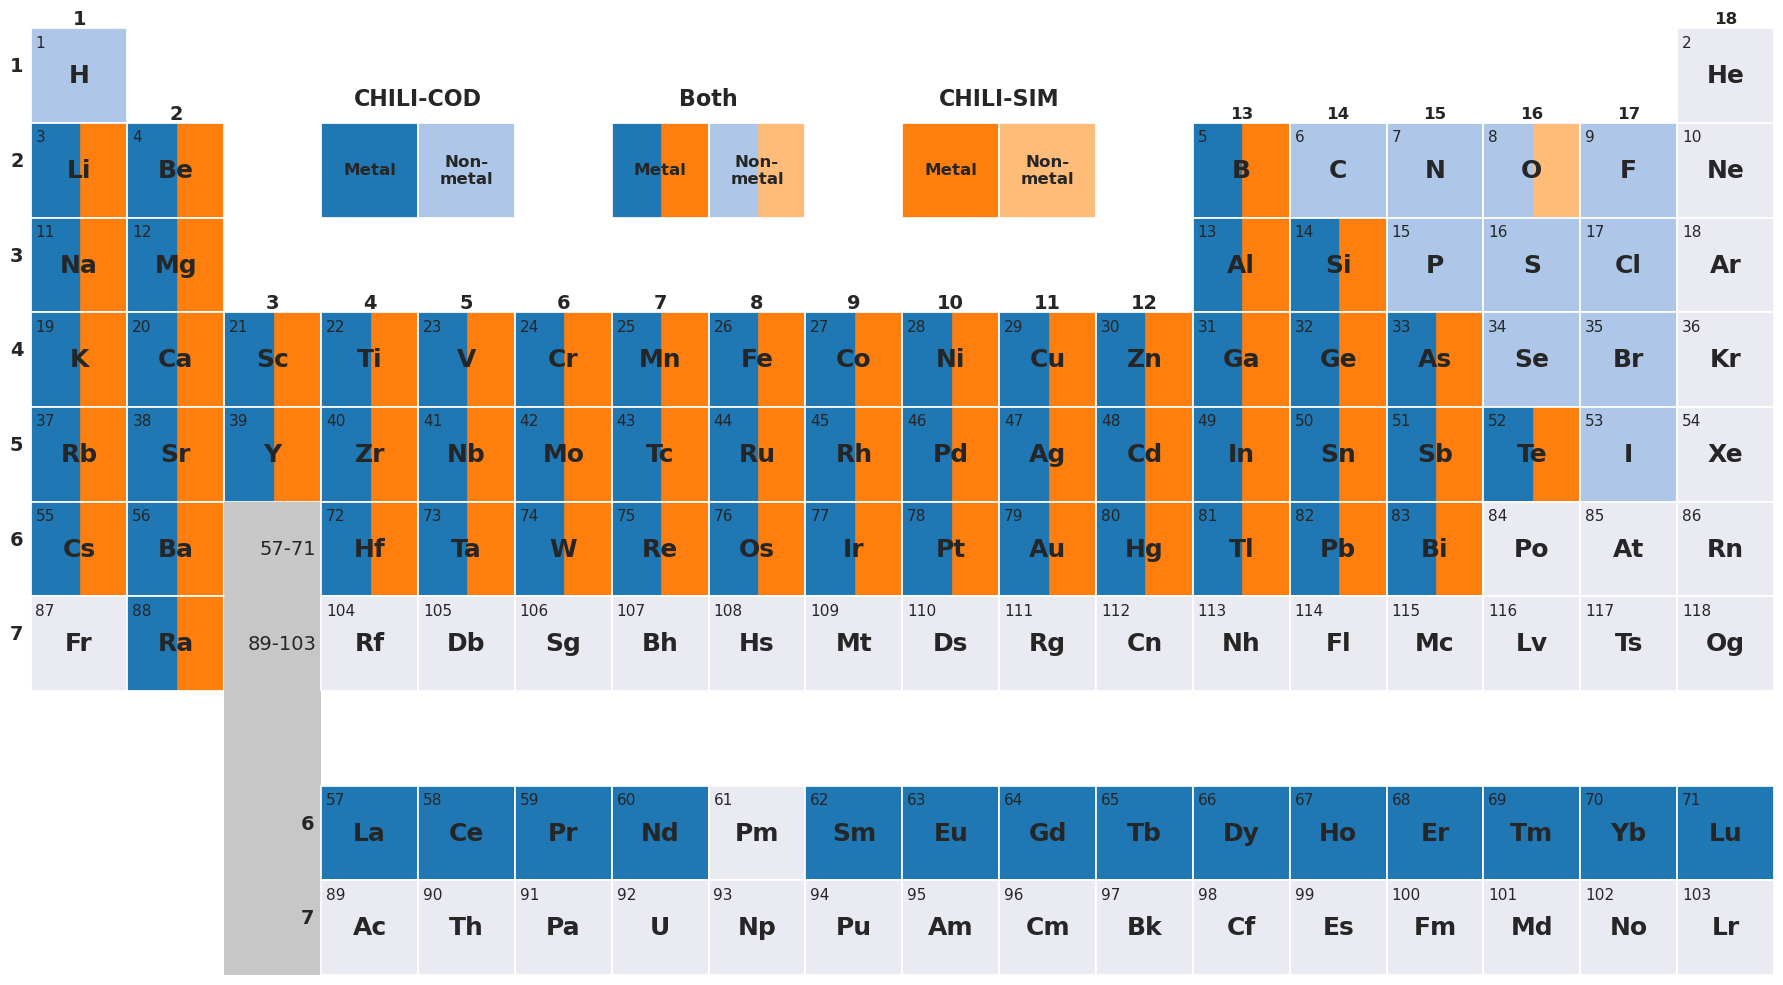

In [128]:
# 10 x 18 subplots with no whitespace and no axes
fig, axs = plt.subplots(10, 18, figsize=(18, 10), sharex=True, sharey=True, gridspec_kw=dict(wspace=0, hspace=0), subplot_kw=dict(xticks=[], yticks=[]))
# List of all element symbols in the periodic table without lanthanides and actinides
elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne',
            'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar',
            'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
            'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr',
            'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd',
            'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe',
            'Cs', 'Ba', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt',
            'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn',
            'Fr', 'Ra', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt',
            'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']

# List of all atom numbers in the periodic table without lanthanides and actinides
atom_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                11, 12, 13, 14, 15, 16, 17, 18,
                19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
                29, 30, 31, 32, 33, 34, 35, 36,
                37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
                47, 48, 49, 50, 51, 52, 53, 54,
                55, 56, 72, 73, 74, 75, 76, 77, 78,
                79, 80, 81, 82, 83, 84, 85, 86,
                87, 88, 104, 105, 106, 107, 108, 109,
                110, 111, 112, 113, 114, 115, 116, 117, 118]

# List of all lanthanides
lanthanides = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb',
               'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
# List of all atom numbers in the lanthanides
lanthanide_numbers = [57, 58, 59, 60, 61, 62, 63, 64, 65,
                      66, 67, 68, 69, 70, 71]

# List of all actinides
actinides = ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk',
             'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
# List of all atom numbers in the actinides
actinide_numbers = [89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99, 100, 101, 102, 103]

# Fill in all elements in the periodic table without lanthanides and actinides
atom_index = 0
for i in range(10):
    if i == 7:
        break
    for j in range(18):
        if j == 0 and i < 7:
            # Label the periods
            axs[i,j].set_ylabel(f'{i+1}', rotation=0, labelpad=10, fontsize=14, fontweight='bold')
        elif i == 0 and 1 <= j <= 16:
            # Remove the top row of the periodic table
            axs[i,j].axis('off')
            continue
        elif i in [1,2] and 2 <= j <= 11:
            axs[i,j].axis('off')
            continue
        elif i in [5,6] and j == 2:
            # Skip the lanthanides and actinides
            if i == 5:
                axs[i,j].annotate('57-71', (0.95, 0.5), xycoords='axes fraction', va='center', ha='right', fontsize=14)
            elif i == 6:
                axs[i,j].annotate('89-103', (0.95, 0.5), xycoords='axes fraction', va='center', ha='right', fontsize=14)
            
            for s in axs[i,j].spines:
                axs[i,j].spines[s].set_visible(False)
            # axs[i,j].axis('off')
            continue
        # Write atomic number in upper left corner of subplot
        axs[i,j].annotate(f'{atom_numbers[atom_index]}', (0.05, 0.93), xycoords='axes fraction', va='top', ha='left', fontsize=11)
        # Write atomic symbol in center of subplot
        axs[i,j].annotate(f'{elements[atom_index]}', (0.5, 0.5), xycoords='axes fraction', va='center', ha='center', fontsize=18, fontweight='bold')
        
        # Set the opacity of the background color based on if it is a ligans or not
        if atom_numbers[atom_index] in ligands:
            color_1 = plt.cm.tab20(1)
            color_2 = plt.cm.tab20(3)
        else:
            color_1 = 'tab:blue'
            color_2 = 'tab:orange'
        
        # Color the background of the subplot
        if atom_numbers[atom_index] in elements_2 and atom_numbers[atom_index] in elements_1:
            axs[i,j].set_facecolor(color_2)
            # Add a blue box covering half of the subplot
            axs[i,j].add_patch(plt.Rectangle((0, 0), 0.5, 1, color=color_1))
        elif atom_numbers[atom_index] in elements_2:
            axs[i,j].set_facecolor(color_2)
        elif atom_numbers[atom_index] in elements_1:
            axs[i,j].set_facecolor(color_1)
        atom_index += 1
# Fill in all lanthanides
for i, (elm, num) in enumerate(zip(lanthanides, lanthanide_numbers)):
    if i == 0:
        # Label the periods
        axs[8,3+i].set_ylabel('6', rotation=0, labelpad=10, fontsize=14, fontweight='bold')
    axs[8,3+i].annotate(f'{num}', (0.05, 0.93), xycoords='axes fraction', va='top', ha='left', fontsize=11)
    axs[8,3+i].annotate(f'{elm}', (0.5, 0.5), xycoords='axes fraction', va='center', ha='center', fontsize=18, fontweight='bold')
    # Color the background of the subplot
    if num in elements_2 and num in elements_1:
        axs[8,3+i].set_facecolor('tab:orange')
        # Add a blue box covering half of the subplot
        axs[8,3+i].add_patch(plt.Rectangle((0, 0), 0.5, 1, color='tab:blue'))
    elif num in elements_2:
        axs[8,3+i].set_facecolor('tab:orange')
    elif num in elements_1:
        axs[8,3+i].set_facecolor('tab:blue')
# Fill in all actinides
for i, (elm, num) in enumerate(zip(actinides, actinide_numbers)):
    if i == 0:
        # Label the periods
        axs[9,3+i].set_ylabel('7', rotation=0, labelpad=10, fontsize=14, fontweight='bold')
    axs[9,3+i].annotate(f'{num}', (0.05, 0.93), xycoords='axes fraction', va='top', ha='left', fontsize=11)
    axs[9,3+i].annotate(f'{elm}', (0.5, 0.5), xycoords='axes fraction', va='center', ha='center', fontsize=18, fontweight='bold')
    # Color the background of the subplot
    if num in elements_2 and num in elements_1:
        axs[9,3+i].set_facecolor('tab:orange')
        # Add a blue box covering half of the subplot
        axs[9,3+i].add_patch(plt.Rectangle((0, 0), 0.5, 1, color='tab:blue'))
    elif num in elements_2:
        axs[9,3+i].set_facecolor('tab:orange')
    elif num in elements_1:
        axs[9,3+i].set_facecolor('tab:blue')
    
# Remove axes from all blank subplots
for i in range(18):
    if i == 2:
        for s in axs[7,i].spines:
            axs[7,i].spines[s].set_visible(False)
    else:
        axs[7,i].axis('off')
for i in range(3):
    if i == 2:
        for s in axs[8,i].spines:
            axs[8,i].spines[s].set_visible(False)
        for s in axs[9,i].spines:
            axs[9,i].spines[s].set_visible(False)
    else:
        axs[8,0+i].axis('off')
        axs[9,0+i].axis('off')
    
# Color connection to lanthanides and actinides blue
for i in range(5):
    axs[5+i,2].set_facecolor(plt.cm.tab20(15))

# Add annotations which indicate the groups on the periodic table
axs[0,0].annotate('1', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=14, fontweight='bold')
axs[1,1].annotate('2', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=14, fontweight='bold')
axs[3,2].annotate('3', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=14, fontweight='bold')
axs[3,3].annotate('4', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=14, fontweight='bold')
axs[3,4].annotate('5', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=14, fontweight='bold')
axs[3,5].annotate('6', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=14, fontweight='bold')
axs[3,6].annotate('7', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=14, fontweight='bold')
axs[3,7].annotate('8', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=14, fontweight='bold')
axs[3,8].annotate('9', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=14, fontweight='bold')
axs[3,9].annotate('10', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=14, fontweight='bold')
axs[3,10].annotate('11', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=14, fontweight='bold')
axs[3,11].annotate('12', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=14, fontweight='bold')
axs[1,12].annotate('13', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=12, fontweight='bold')
axs[1,13].annotate('14', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=12, fontweight='bold')
axs[1,14].annotate('15', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=12, fontweight='bold')
axs[1,15].annotate('16', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=12, fontweight='bold')
axs[1,16].annotate('17', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=12, fontweight='bold')
axs[0,17].annotate('18', (0.5, 1.1), xycoords='axes fraction', va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotations to the top middle of the plot that show which dataset each color corresponds to
# Show the color for dataset1
axs[1,3].axis('on')
axs[1,3].set_facecolor('tab:blue')
axs[1,4].axis('on')
axs[1,4].set_facecolor(plt.cm.tab20(1))
axs[1,3].annotate('CHILI-COD', (1, 1.25), xycoords='axes fraction', va='center', ha='center', fontsize=16, fontweight='bold')
axs[1,3].annotate('Metal', (0.5, 0.5), xycoords='axes fraction', va='center', ha='center', fontsize=12, fontweight='bold')
axs[1,4].annotate('Non-\nmetal', (0.5, 0.5), xycoords='axes fraction', va='center', ha='center', fontsize=12, fontweight='bold')

# Show the color for both datasets
axs[1,6].axis('on')
axs[1,6].set_facecolor('tab:orange')
axs[1,6].add_patch(plt.Rectangle((0, 0), 0.5, 1, color='tab:blue'))
axs[1,7].axis('on')
axs[1,7].set_facecolor(plt.cm.tab20(3))
axs[1,7].add_patch(plt.Rectangle((0, 0), 0.5, 1, color=plt.cm.tab20(1)))
axs[1,6].annotate('Both', (1, 1.25), xycoords='axes fraction', va='center', ha='center', fontsize=16, fontweight='bold')
axs[1,6].annotate('Metal', (0.5, 0.5), xycoords='axes fraction', va='center', ha='center', fontsize=12, fontweight='bold')
axs[1,7].annotate('Non-\nmetal', (0.5, 0.5), xycoords='axes fraction', va='center', ha='center', fontsize=12, fontweight='bold')

# Show the color for dataset2
axs[1,9].axis('on')
axs[1,9].set_facecolor('tab:orange')
axs[1,10].axis('on')
axs[1,10].set_facecolor(plt.cm.tab20(3))
axs[1,9].annotate('CHILI-SIM', (1, 1.25), xycoords='axes fraction', va='center', ha='center', fontsize=16, fontweight='bold')
axs[1,9].annotate('Metal', (0.5, 0.5), xycoords='axes fraction', va='center', ha='center', fontsize=12, fontweight='bold')
axs[1,10].annotate('Non-\nmetal', (0.5, 0.5), xycoords='axes fraction', va='center', ha='center', fontsize=12, fontweight='bold')

fig.tight_layout()
# fig.savefig('./test_stats_periodicTable.pdf', format='pdf', dpi=300)
fig.show()

In [102]:
plt.cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)